In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from scipy import stats

In [2]:
def percDiff(art, omn):
    percent_diff = (np.abs(np.subtract(art, omn)) / (omn)) * 100
    return percent_diff

KeyboardInterrupt: 

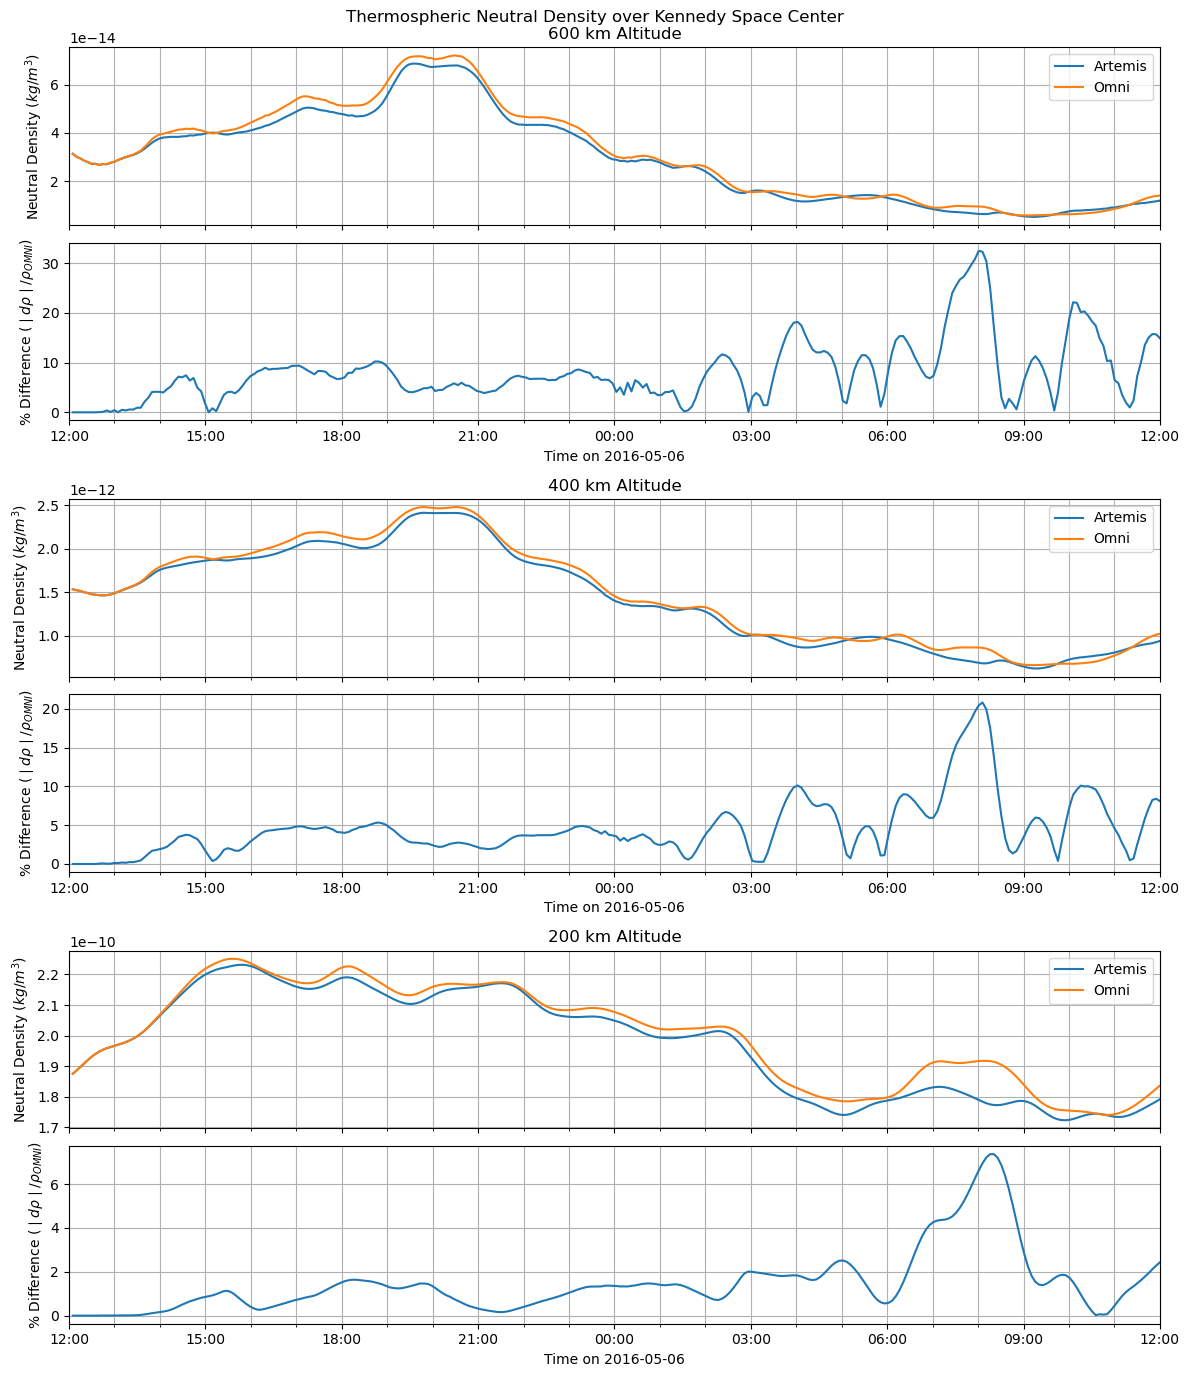

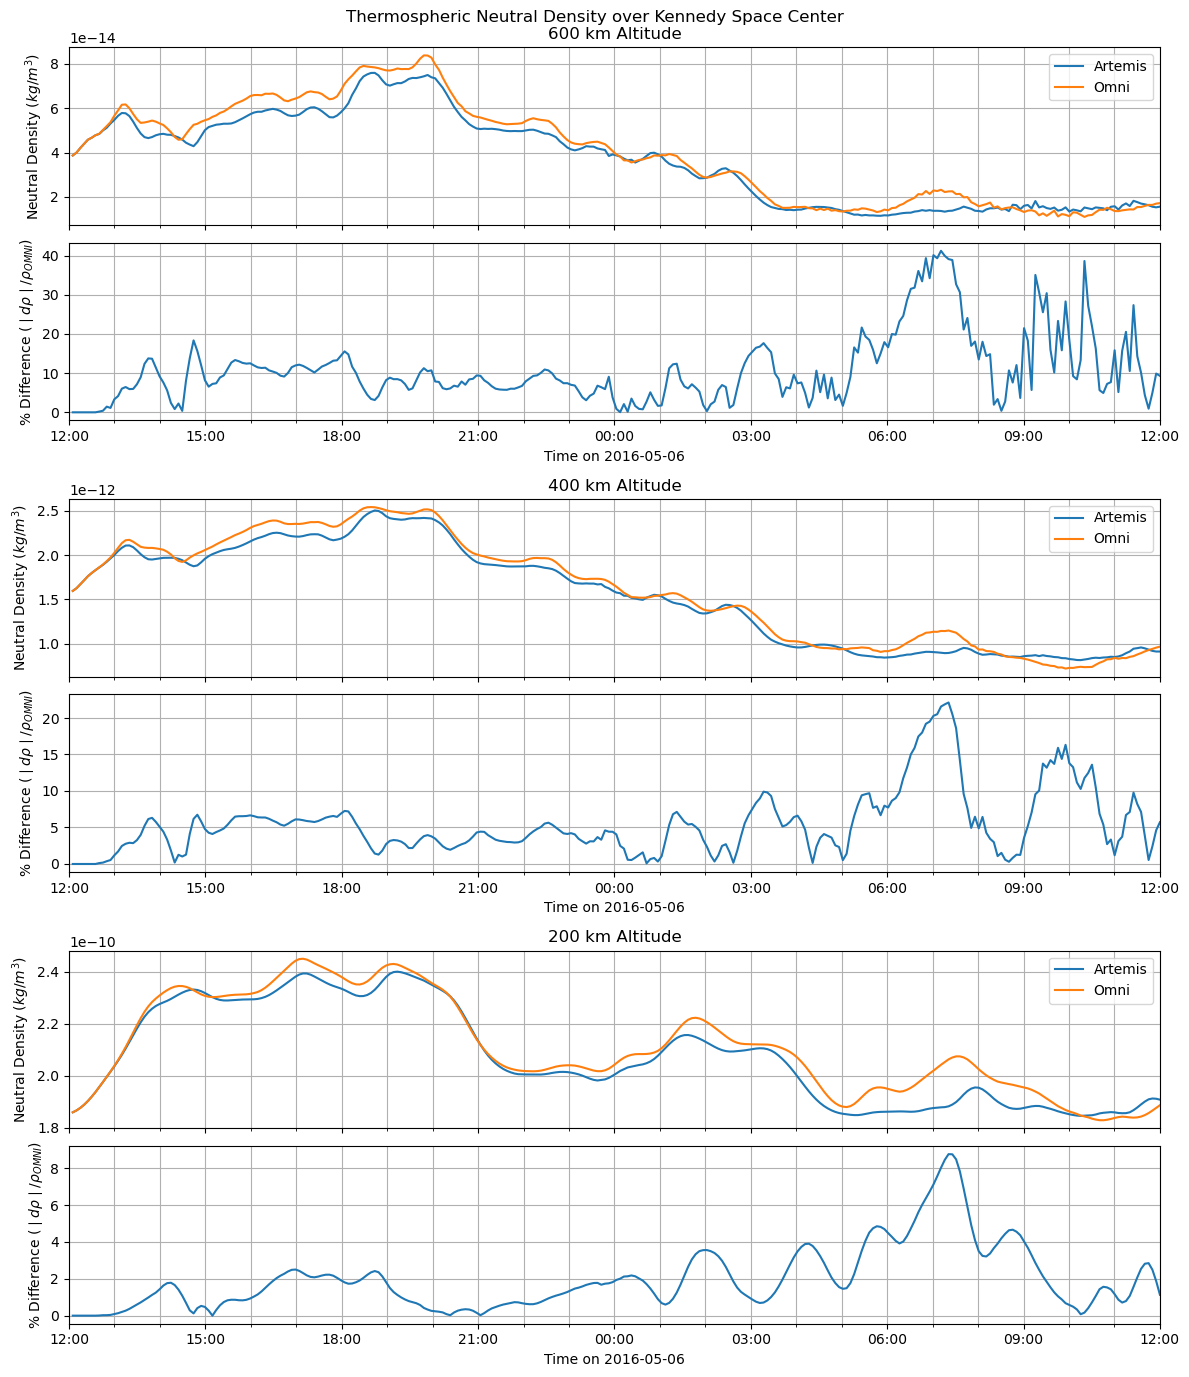

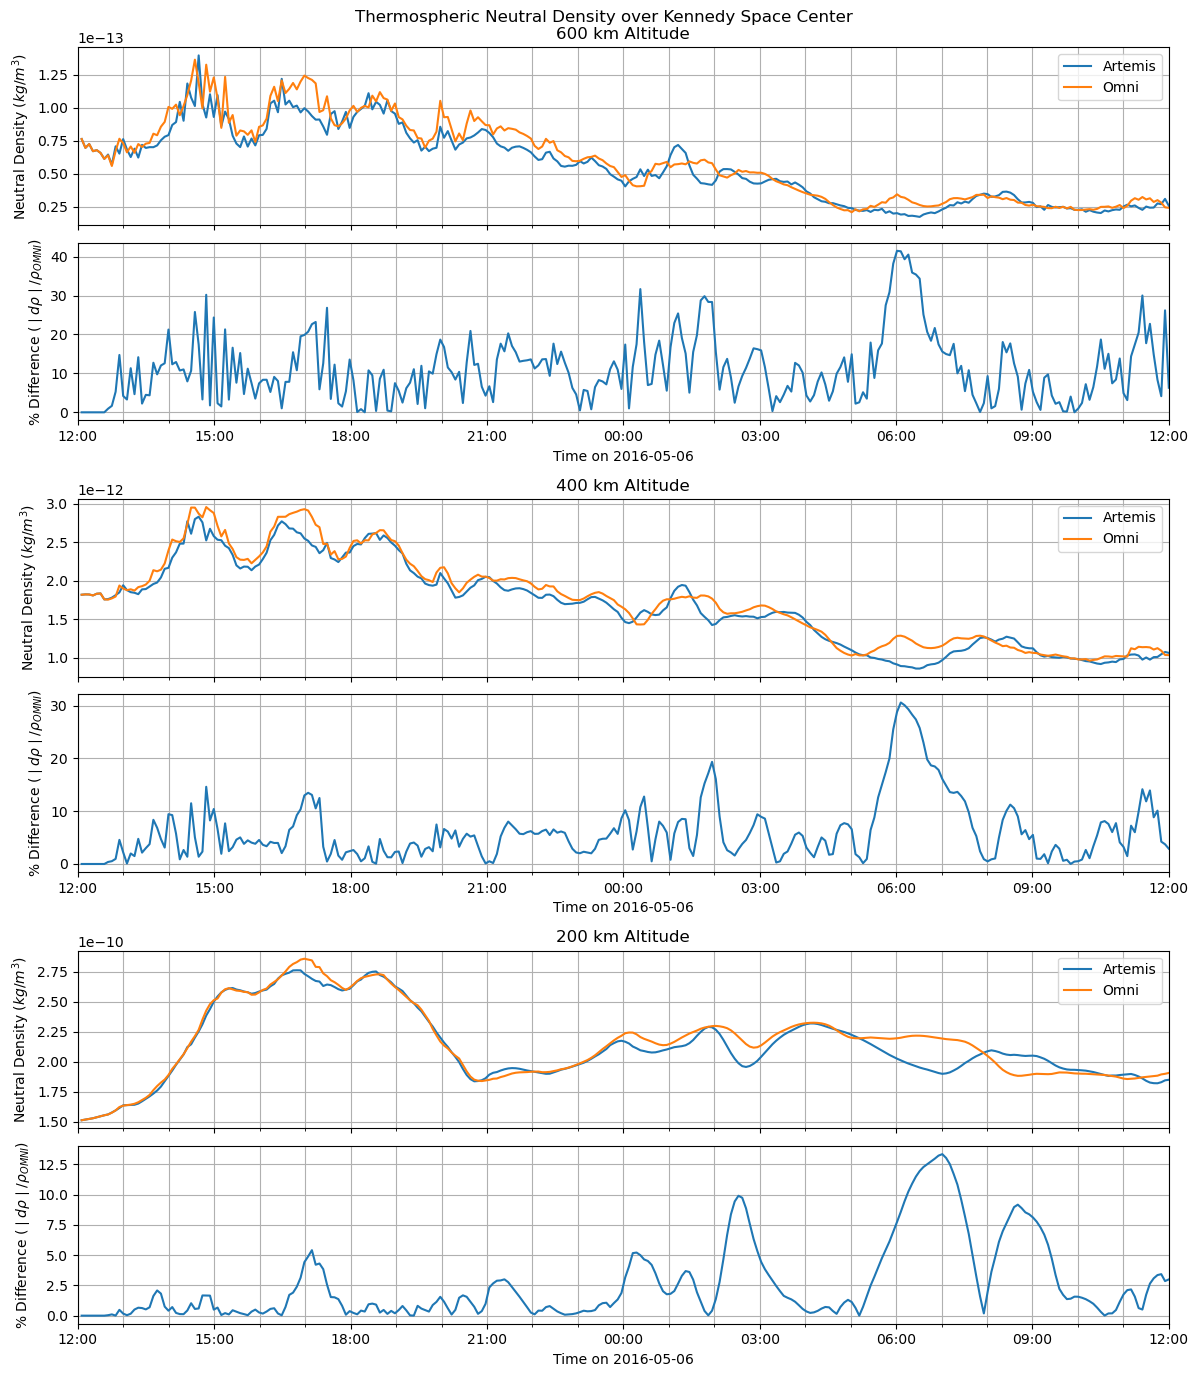

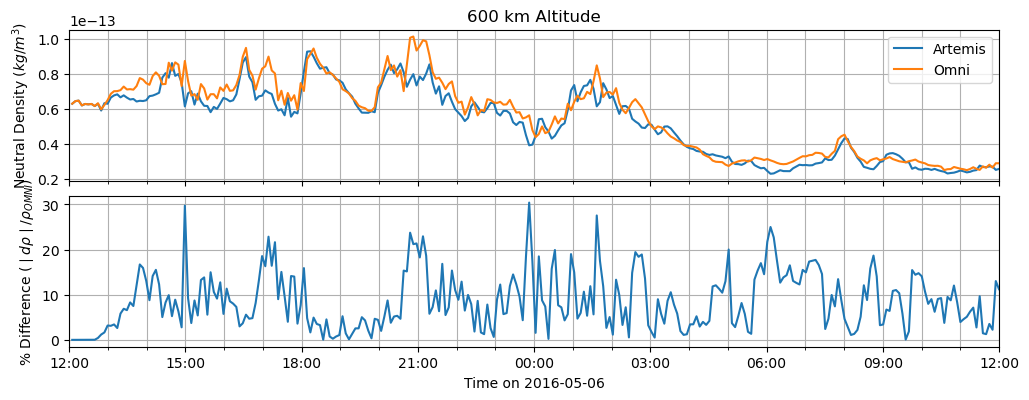

In [3]:
# Plot the neutral densities at all altitudes for KSC
dates = ['20160506']    # List of dates in the output files. These may be the date that the pre-run starts on
alts = ['600', '400', '200']    # Altitudes at which to analyze. This is for list comprehension purposes

for d in dates: # Loop thought all events
    for latitudes in (95, 108, 128, 136):
        errKSC = pd.DataFrame(columns=alts) # Make a dataframe to store errors in, and the columns of the dataframe will be the altitudes (so there is a column for errors at 200km, 400km, ...)
        fig = plt.figure(figsize=(12, 14))  # Initialize the plot
        outer = gridspec.GridSpec(nrows=3, ncols=1) # Outer gridspec for the plot - there are 3 figures, which will be in one column

        for i, a in enumerate(alts):

            omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')
            artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')

            if d == '20121113':
                offset = 0
                d_new = '20121113'
            elif d == '20160506':
                offset = 12
                d_new = '20160506'
            else:
                offset = 0
                d_new = '20221024'

            n = len(omni['ut'])
            evenly_spaced_hours = np.linspace(0.083, 24.000, n)
            base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date

            timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
            left_timestamp = base_date+timedelta(hours=offset)

            kennedyOmni = []
            kennedyArtemis = []

            for j in range(len(omni['ut'])):

                # 112*2.5 deg/lon = 280E, 95*1.25 deg/lat = 28.75N or 188.75 S
                kennedyOmni.append(omni['rho'][j, 112, latitudes])
                kennedyArtemis.append(artemis['rho'][j, 112, latitudes])

            inner = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=outer[i], hspace=0.1)
            ax0 = fig.add_subplot(inner[0, 0])
            ax1 = fig.add_subplot(inner[1, 0], sharex=ax0)

            ax0.plot(timestamps, kennedyArtemis, label='Artemis')
            ax0.plot(timestamps, kennedyOmni, label='Omni')
            ax0.set(ylabel=r'Neutral Density ($kg/m^{3}$)')
            ax0.legend(loc='upper right')
            ax0.set_title(f'{a} km Altitude')
            ax0.grid(visible=True, which='both', axis='both')


            diff = percDiff(kennedyArtemis, kennedyOmni)
            errKSC[a] = diff

            ax1.plot(timestamps, diff)
            ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
            ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute
            #ax1.set_xlim([timestamps[0], timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
            ax1.set_xlim([left_timestamp, timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
            ax1.set(xlabel=f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
            ax1.grid(visible=True, which='both', axis='both')


            plt.setp(ax0.get_xticklabels(), visible=False)

        plt.suptitle(f'Thermospheric Neutral Density over Kennedy Space Center')
        plt.tight_layout()
        #plt.savefig(f'overlap_plots/ksc/KSC_neutral_{d_new}.jpg', dpi=300)

2012-11-13
@ 600km: Avg = 3.04, Med = 2.731, Min = 0.017, Max = 13.304
2012-11-13
@ 400km: Avg = 1.728, Med = 1.575, Min = 0.018, Max = 6.872
2012-11-13
@ 200km: Avg = 0.705, Med = 0.597, Min = 0.001, Max = 2.503
2016-05-06
@ 600km: Avg = 7.966, Med = 6.836, Min = 0.0, Max = 32.502
2016-05-06
@ 400km: Avg = 4.535, Med = 3.725, Min = 0.0, Max = 20.823
2016-05-06
@ 200km: Avg = 1.473, Med = 1.26, Min = 0.0, Max = 7.37
2022-10-24
@ 600km: Avg = 4.845, Med = 3.37, Min = 0.0, Max = 22.229
2022-10-24
@ 400km: Avg = 1.437, Med = 1.132, Min = 0.0, Max = 5.688
2022-10-24
@ 200km: Avg = 0.332, Med = 0.288, Min = 0.0, Max = 1.258


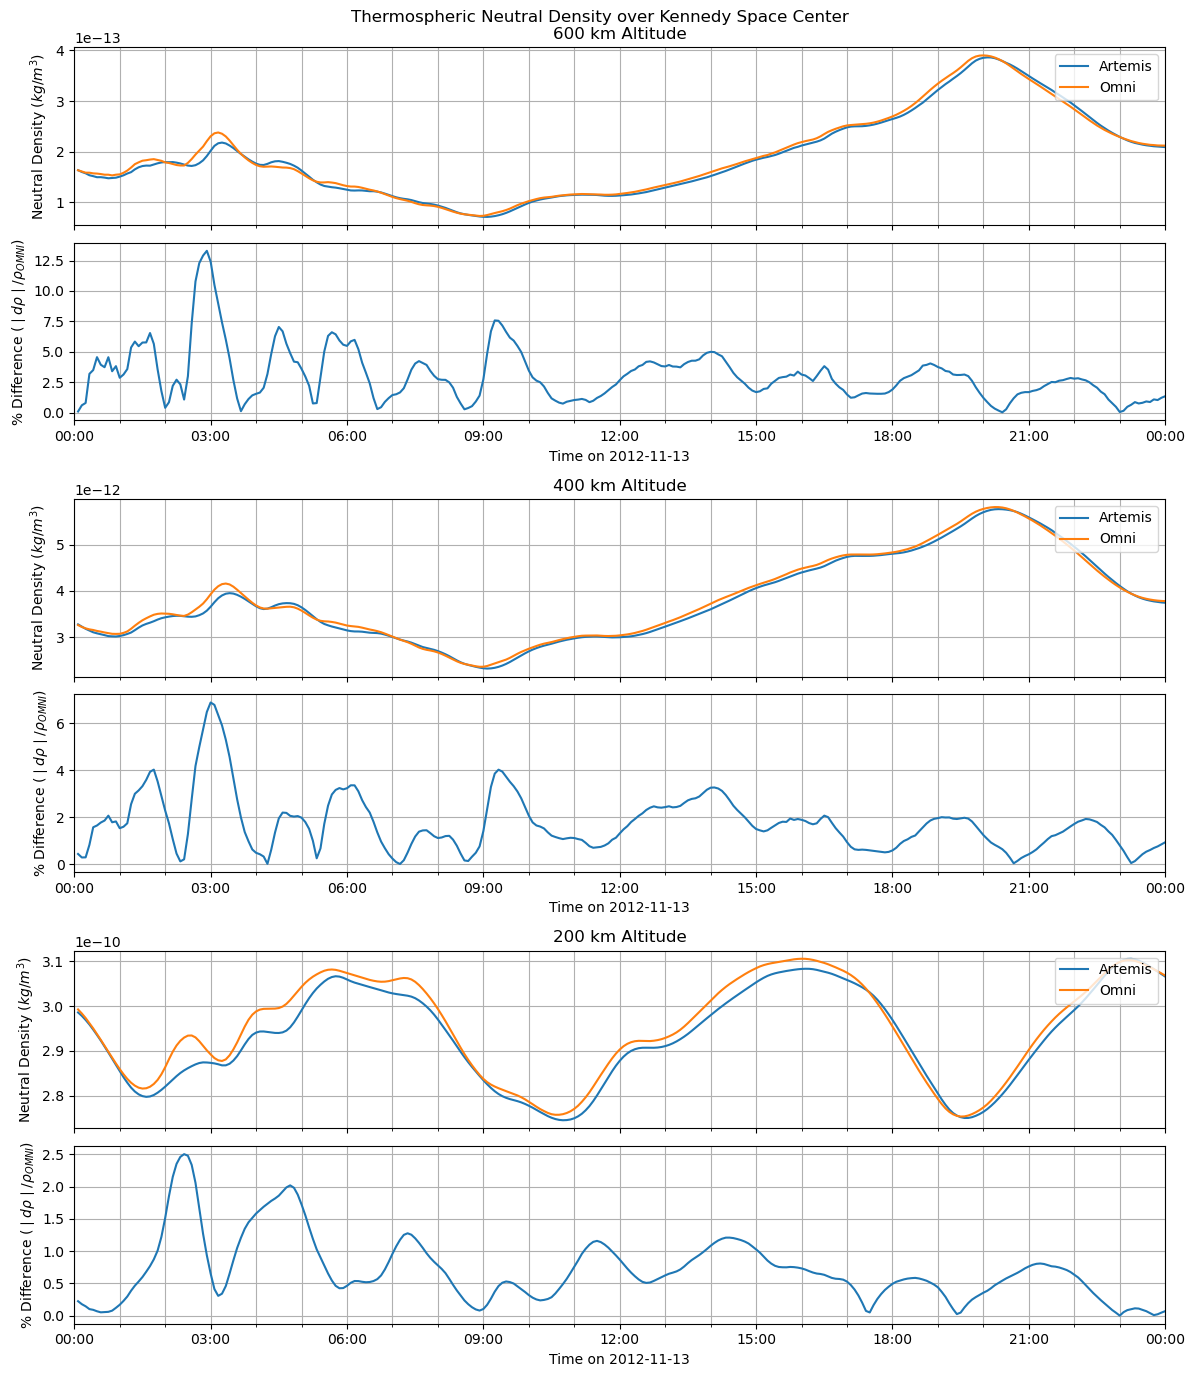

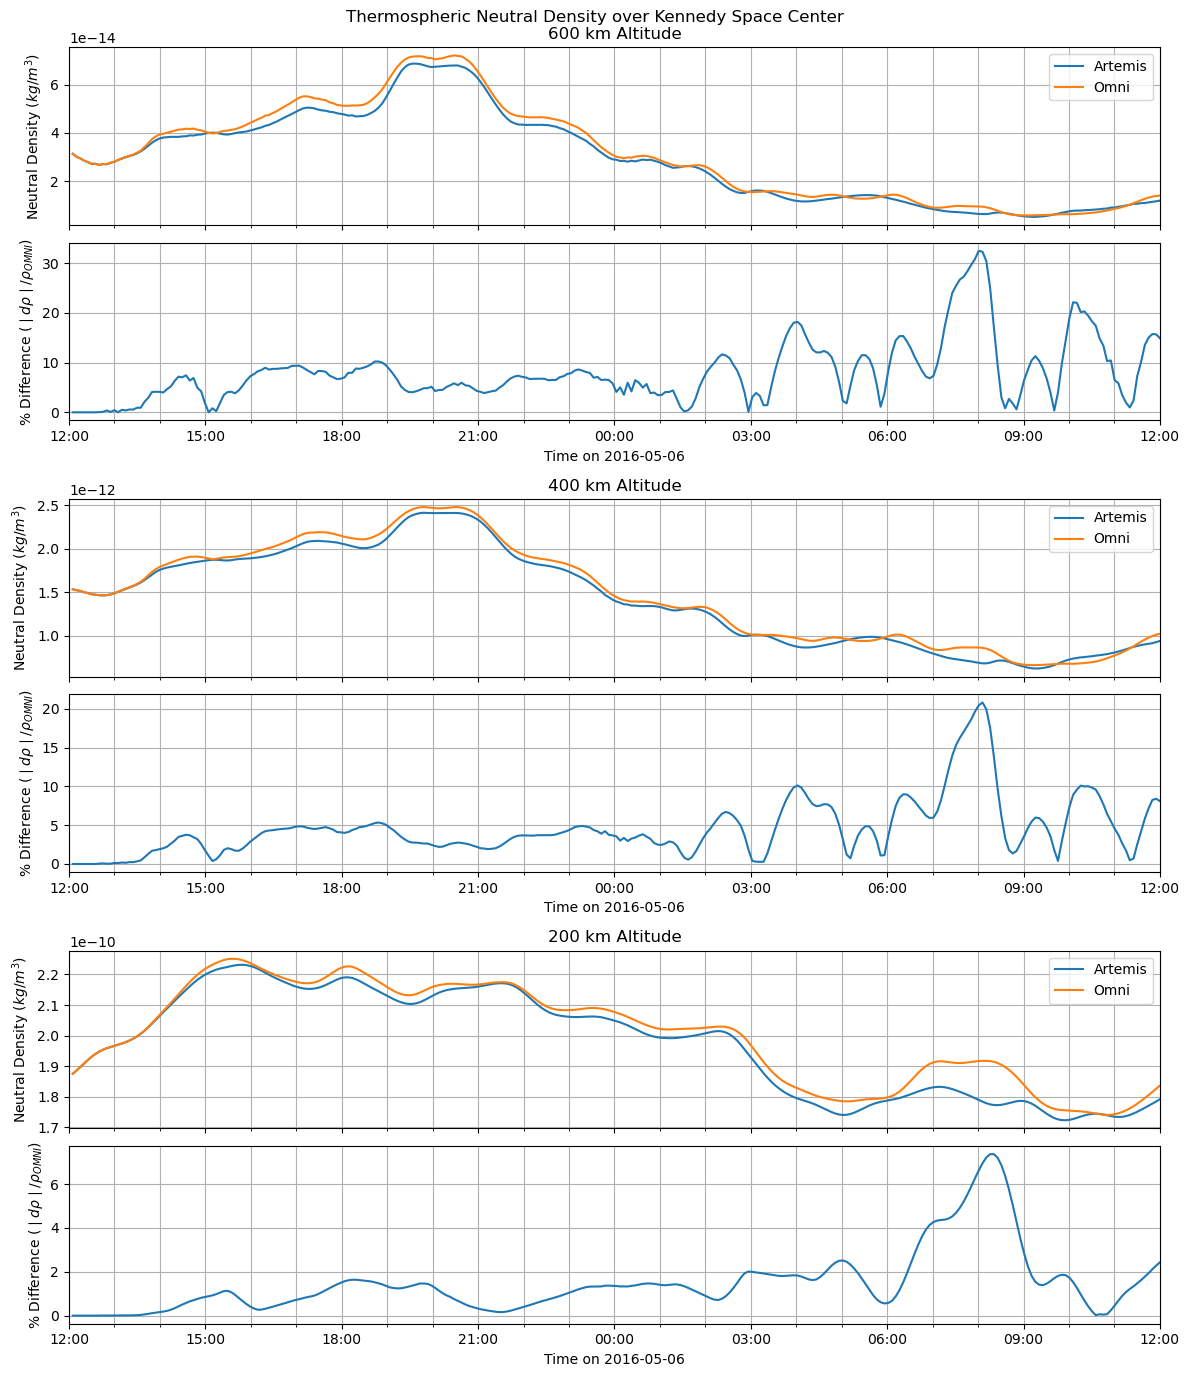

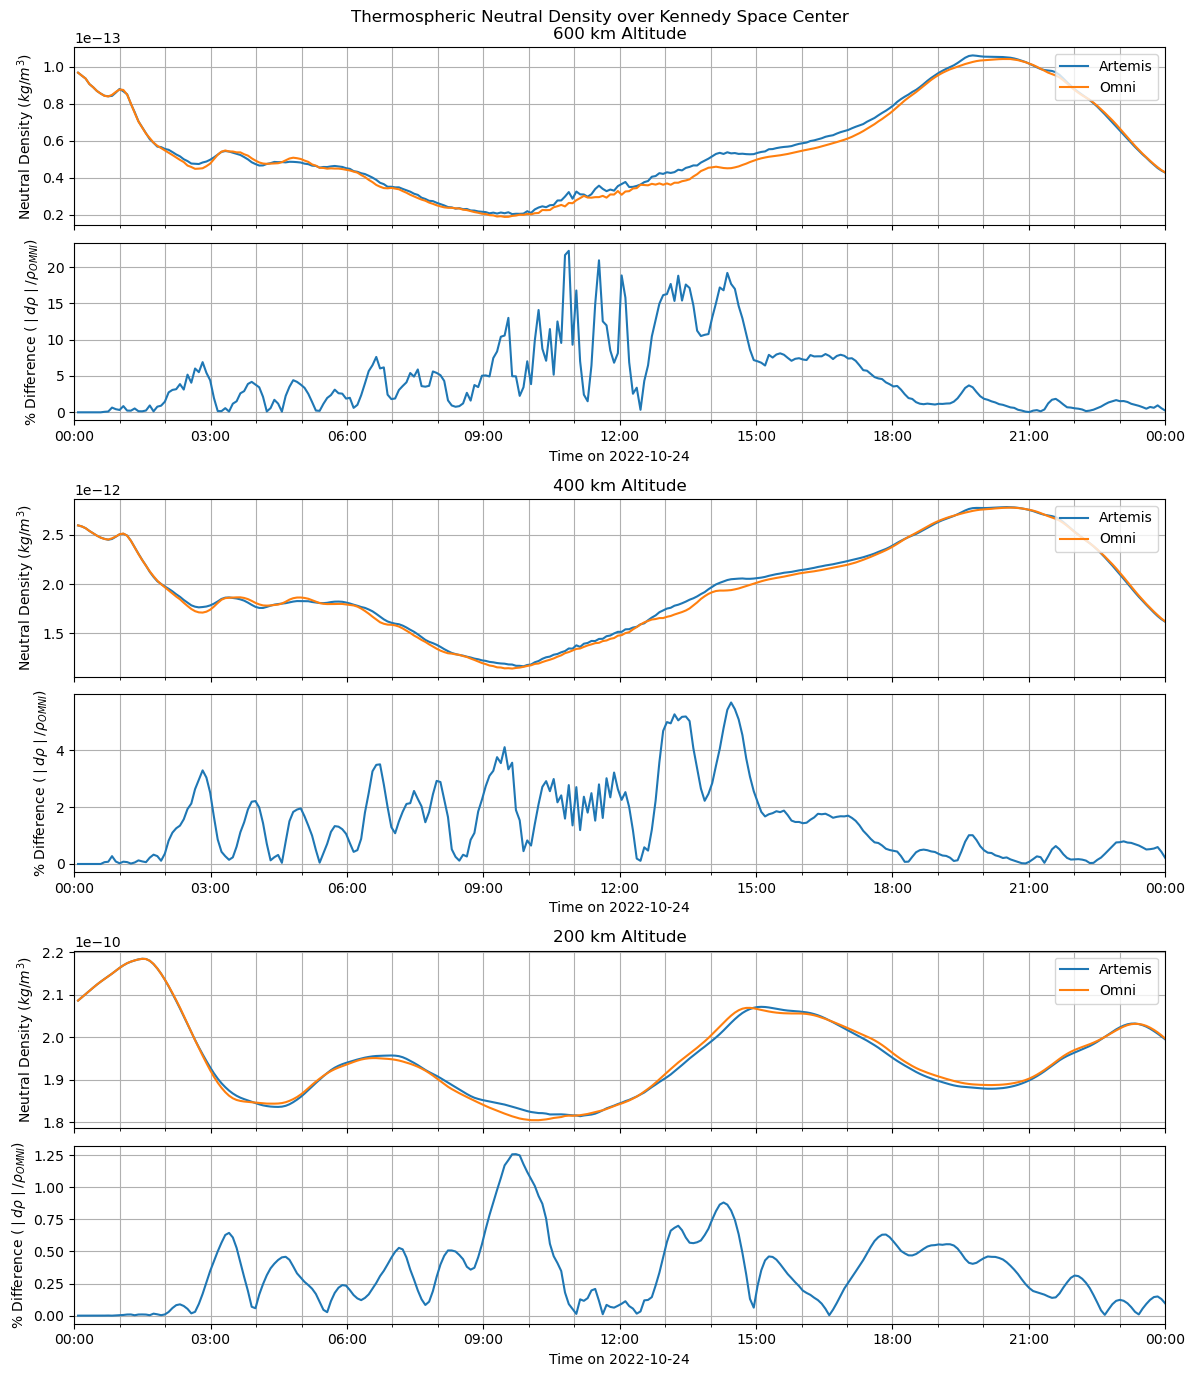

In [3]:
# Plot the neutral densities at all altitudes for KSC

dates = ['20121113', '20160506', '20221023']    # List of dates in the output files. These may be the date that the pre-run starts on
alts = ['600', '400', '200']    # Altitudes at which to analyze. This is for list comprehension purposes

for d in dates: # Loop thought all events
    errKSC = pd.DataFrame(columns=alts) # Make a dataframe to store errors in, and the columns of the dataframe will be the altitudes (so there is a column for errors at 200km, 400km, ...)

    fig = plt.figure(figsize=(12, 14))  # Initialize the plot
    outer = gridspec.GridSpec(nrows=3, ncols=1) # Outer gridspec for the plot - there are 3 figures, which will be in one column

    for i, a in enumerate(alts):

        omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')
        artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')

        if d == '20121113':
            offset = 0
            d_new = '20121113'
        elif d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        n = len(omni['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date

        timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
        left_timestamp = base_date+timedelta(hours=offset)

        kennedyOmni = []
        kennedyArtemis = []

        for j in range(len(omni['ut'])):

            # 112*2.5 deg/lon = 280E, 95*1.25 deg/lat = 28.75N or 188.75 S
            kennedyOmni.append(omni['rho'][j, 112, 95])
            kennedyArtemis.append(artemis['rho'][j, 112, 95])

        inner = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=outer[i], hspace=0.1)
        ax0 = fig.add_subplot(inner[0, 0])
        ax1 = fig.add_subplot(inner[1, 0], sharex=ax0)

        ax0.plot(timestamps, kennedyArtemis, label='Artemis')
        ax0.plot(timestamps, kennedyOmni, label='Omni')
        ax0.set(ylabel=r'Neutral Density ($kg/m^{3}$)')
        ax0.legend(loc='upper right')
        ax0.set_title(f'{a} km Altitude')
        ax0.grid(visible=True, which='both', axis='both')


        diff = percDiff(kennedyArtemis, kennedyOmni)
        errKSC[a] = diff

        ax1.plot(timestamps, diff)
        ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
        ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute
        #ax1.set_xlim([timestamps[0], timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        ax1.set_xlim([left_timestamp, timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        ax1.set(xlabel=f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
        ax1.grid(visible=True, which='both', axis='both')


        plt.setp(ax0.get_xticklabels(), visible=False)
        print(f'{datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}')
        print(f'@ {a}km: Avg = {round(np.average(diff), 3)}, Med = {round(np.median(diff), 3)}, Min = {round(min(diff), 3)}, Max = {round(max(diff), 3)}')

    plt.suptitle(f'Thermospheric Neutral Density over Kennedy Space Center')
    plt.tight_layout()
    plt.savefig(f'overlap_plots/ksc/KSC_neutral_{d_new}.jpg', dpi=300)

In [22]:
# Plot the neutral densities at all altitudes for CMO

dates = ['20121113','20160506', '20221023']
alts = ['600', '400', '200']

for d in dates:
    errKSC = pd.DataFrame(columns=alts)

    fig = plt.figure(figsize=(12, 14))
    outer = gridspec.GridSpec(nrows=3, ncols=1)

    for i, a in enumerate(alts):

        omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')
        artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')

        n = len(omni['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d, "%Y%m%d").year, datetime.strptime(d, "%Y%m%d").month, datetime.strptime(d, "%Y%m%d").day)  # Base date

        if d == '20121113':
            offset = 0
            d_new = '20121113'
        elif d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
        left_timestamp = base_date+timedelta(hours=offset)

        cmoOmni = []
        cmoArtemis = []

        for j in range(len(omni['ut'])):

            # 85*2.5 deg/lon = 212.5, 124*1.25 deg/lat = 65N or 155 S
            cmoOmni.append(omni['rho'][j, 85, 124])
            cmoArtemis.append(artemis['rho'][j, 85, 124])


        inner = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=outer[i], hspace=0.1)
        ax0 = fig.add_subplot(inner[0, 0])
        ax1 = fig.add_subplot(inner[1, 0], sharex=ax0)

        ax0.plot(timestamps, cmoArtemis, label='Artemis')
        ax0.plot(timestamps, cmoOmni, label='Omni')
        ax0.set(ylabel=r'Neutral Density ($kg/m^{3}$)')
        ax0.legend(loc='upper right')
        ax0.set_title(f'{a} km Altitude')
        ax0.grid(visible=True, which='both', axis='both')


        diff = percDiff(cmoArtemis, cmoOmni)
        errKSC[a] = diff

        ax1.plot(timestamps, diff)
        ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
        ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute
        ax1.set_xlim([left_timestamp, timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        ax1.set(xlabel=f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
        ax1.grid(visible=True, which='both', axis='both')


        plt.setp(ax0.get_xticklabels(), visible=False)
        print(f'Average % Diff @ {a}km: {np.average(diff)}')

    plt.suptitle(f'Thermospheric Neutral Density over College, AK')
    plt.tight_layout()
    plt.savefig(f'overlap_plots/cmo/CMO_neutral_{d_new}.jpg', dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: 'simulation_outputs/20121113_rho_600km_omni.npz'

<Figure size 1200x1400 with 0 Axes>

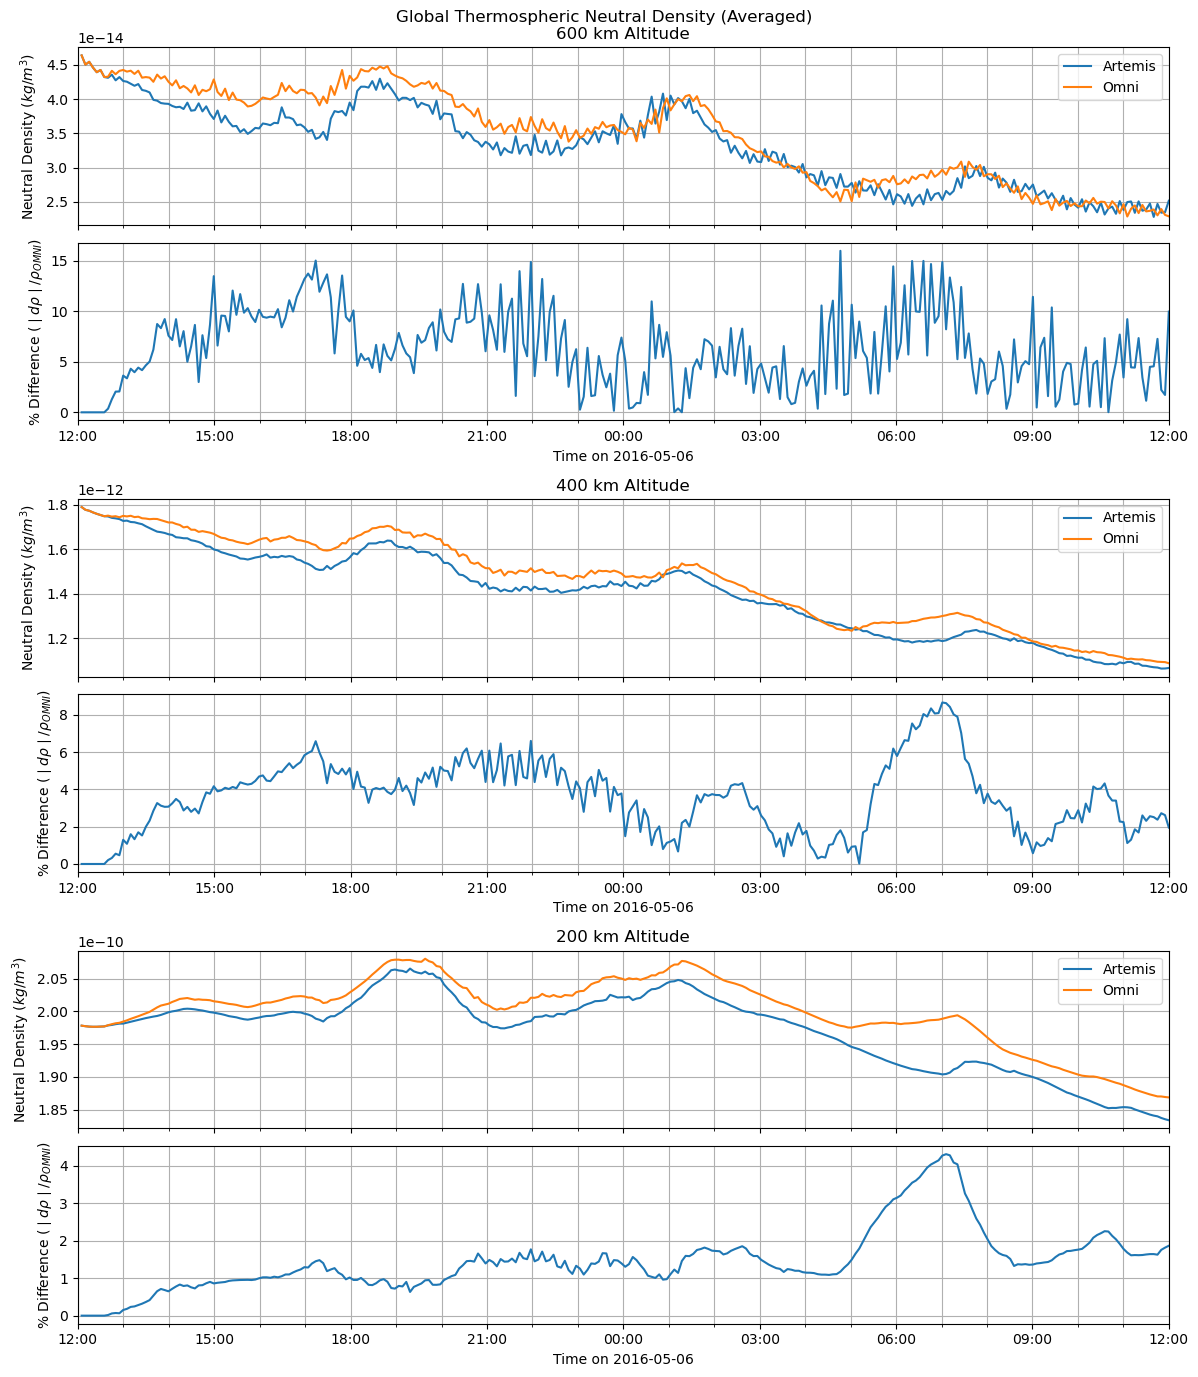

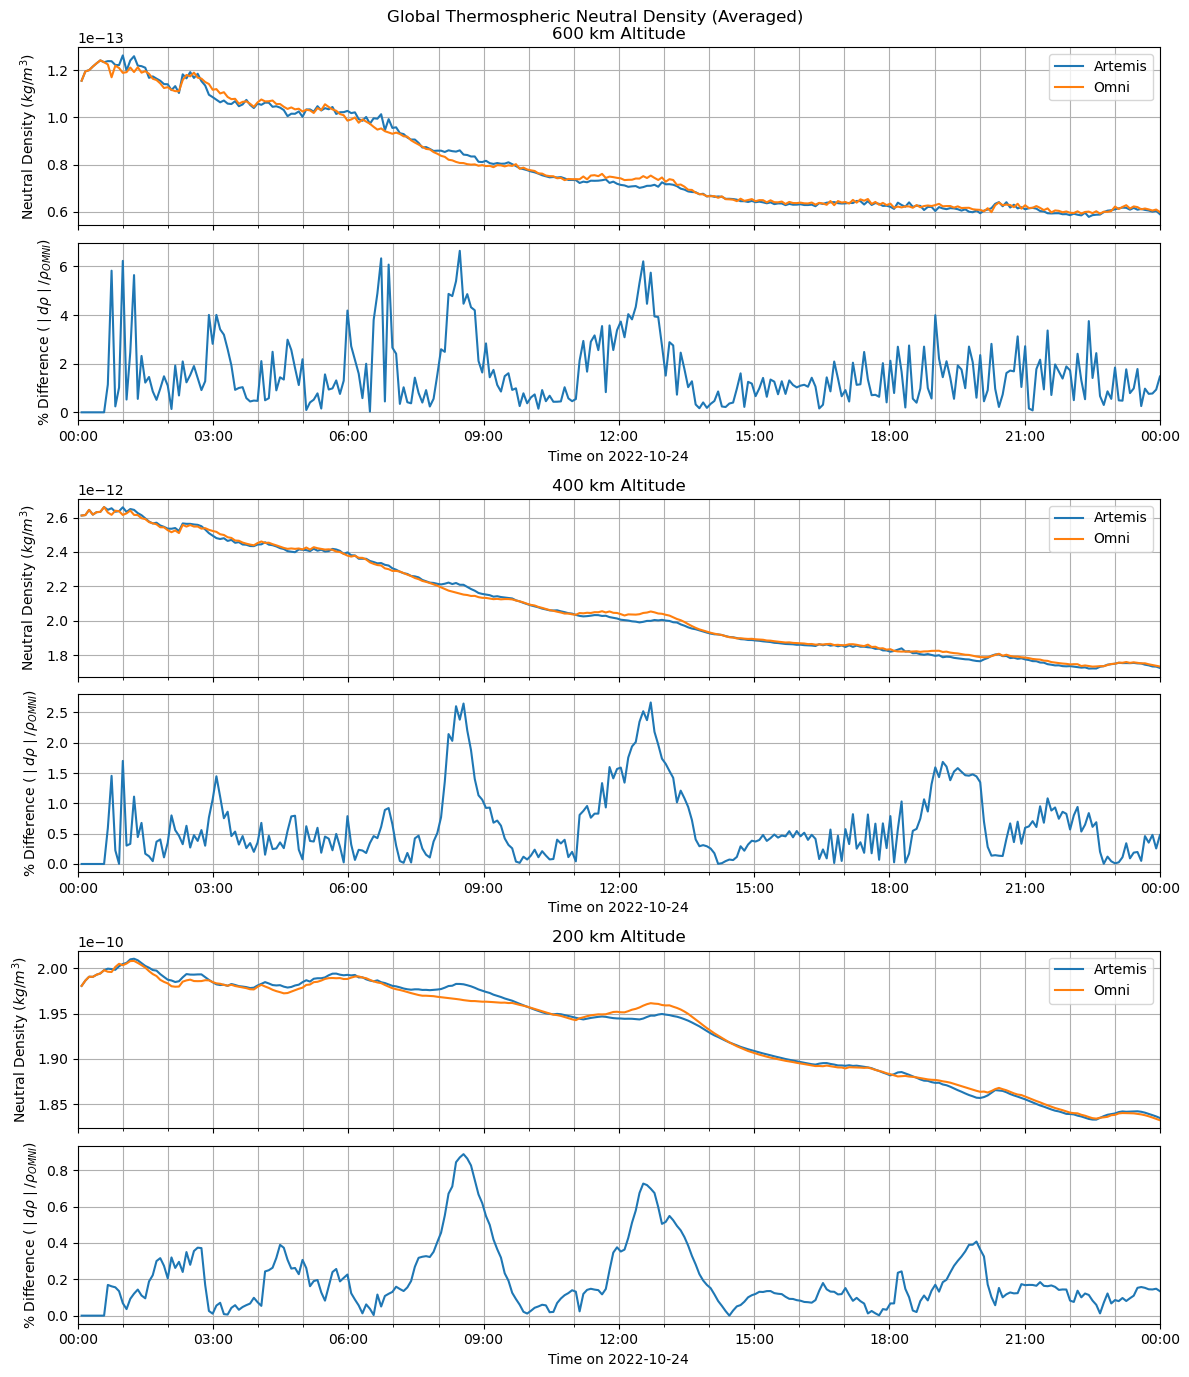

In [11]:
# This plot takes the average of the neutral density over the entire planet and compares them. It calculates the percent difference between both GLOBAl values.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec

dates = ['20160506', '20221023']
alts = ['600', '400', '200']

for d in dates:
    errKSC = pd.DataFrame(columns=alts)

    fig = plt.figure(figsize=(12, 14))
    outer = gridspec.GridSpec(nrows=3, ncols=1)

    for i, a in enumerate(alts):

        omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')
        artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')

        if d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        n = len(omni['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date

        timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
        left_timestamp = base_date+timedelta(hours=offset)

        globalOmni = []
        globalArtemis = []

        for j in range(len(omni['ut'])):
            df_O = pd.DataFrame(omni['rho'][j], columns=omni['glon'][:,0], index=omni['glat'][0])
            df_A = pd.DataFrame(artemis['rho'][j], columns=artemis['glon'][:,0], index=artemis['glat'][0])

            globalOmni.append(np.average(df_O))
            globalArtemis.append(np.average(df_A))

        inner = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=outer[i], hspace=0.1)
        ax0 = fig.add_subplot(inner[0, 0])
        ax1 = fig.add_subplot(inner[1, 0], sharex=ax0)

        ax0.plot(timestamps, globalArtemis, label='Artemis')
        ax0.plot(timestamps, globalOmni, label='Omni')
        ax0.set(ylabel=r'Neutral Density ($kg/m^{3}$)')
        ax0.legend(loc='upper right')
        ax0.set_title(f'{a} km Altitude')
        ax0.grid(visible=True, which='both', axis='both')


        diff = percDiff(globalArtemis, globalOmni)
        errKSC[a] = diff

        ax1.plot(timestamps, diff)
        ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
        ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute
        #ax1.set_xlim([timestamps[0], timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        ax1.set_xlim([left_timestamp, timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        ax1.set(xlabel=f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
        ax1.grid(visible=True, which='both', axis='both')


        plt.setp(ax0.get_xticklabels(), visible=False)


    plt.suptitle(f'Global Thermospheric Neutral Density (Averaged)')
    plt.tight_layout()
    plt.savefig(f'overlap_plots/global_neutral_{d_new}.jpg', dpi=300)

    # errKSC.to_csv('errKSC.csv', index=False)

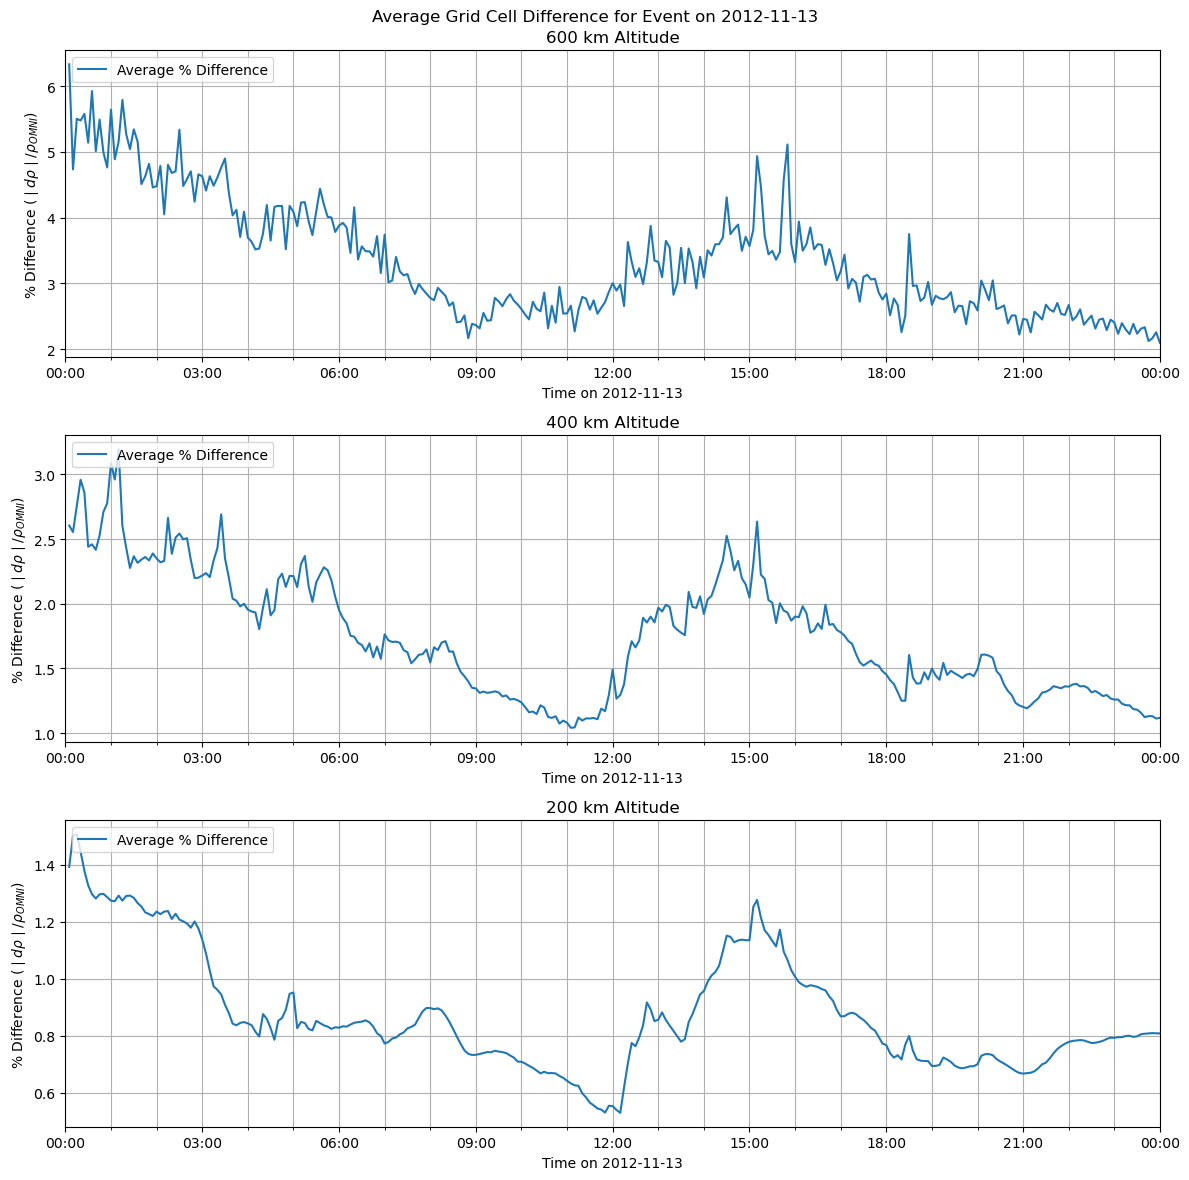

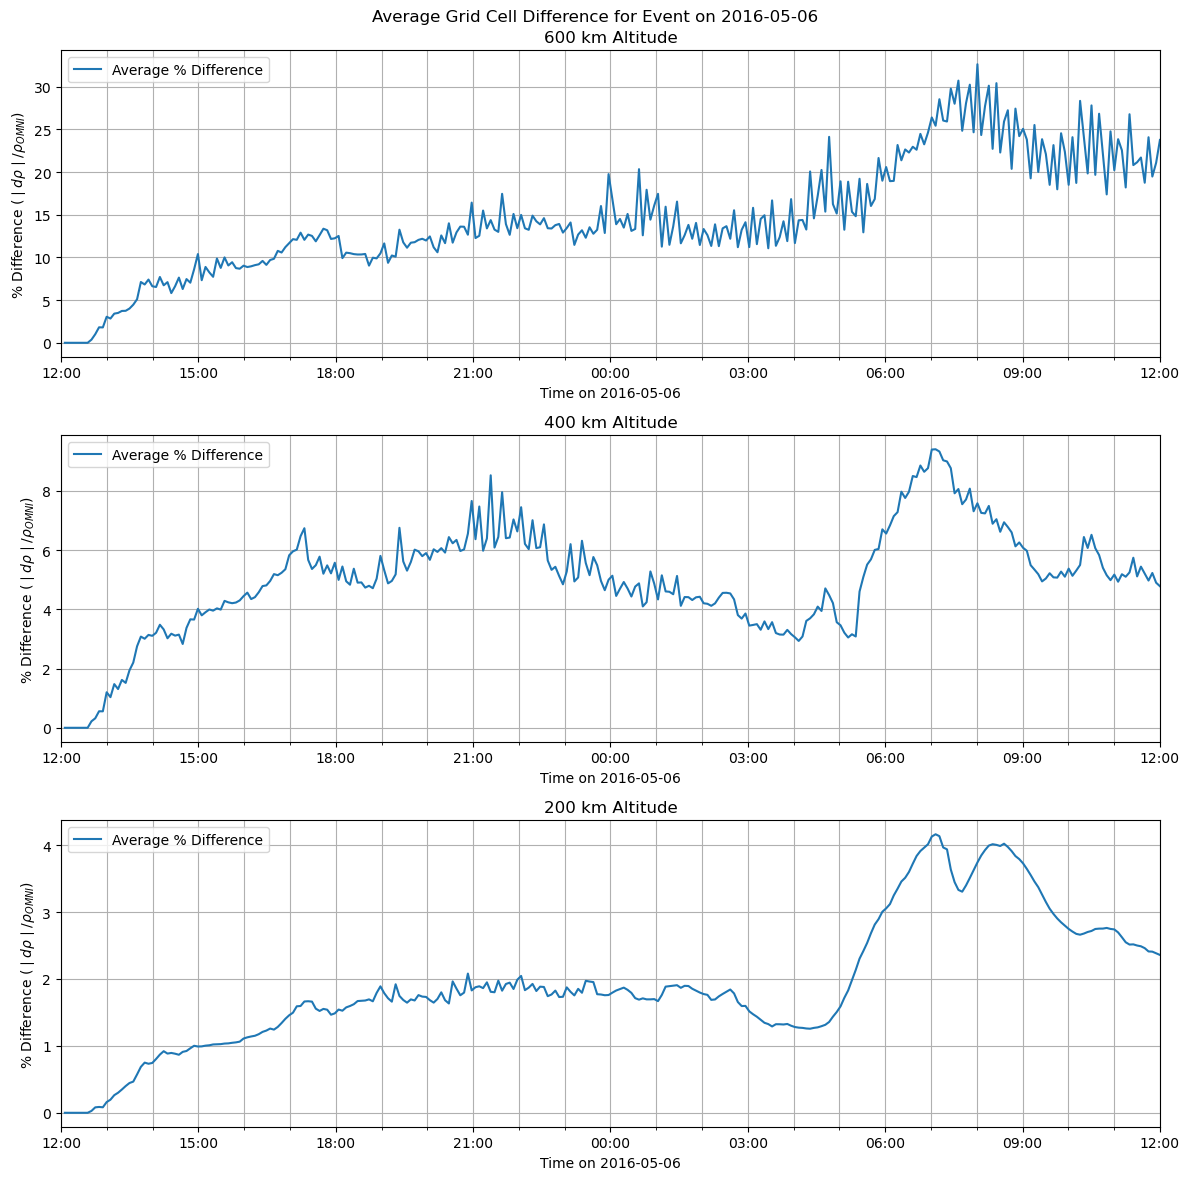

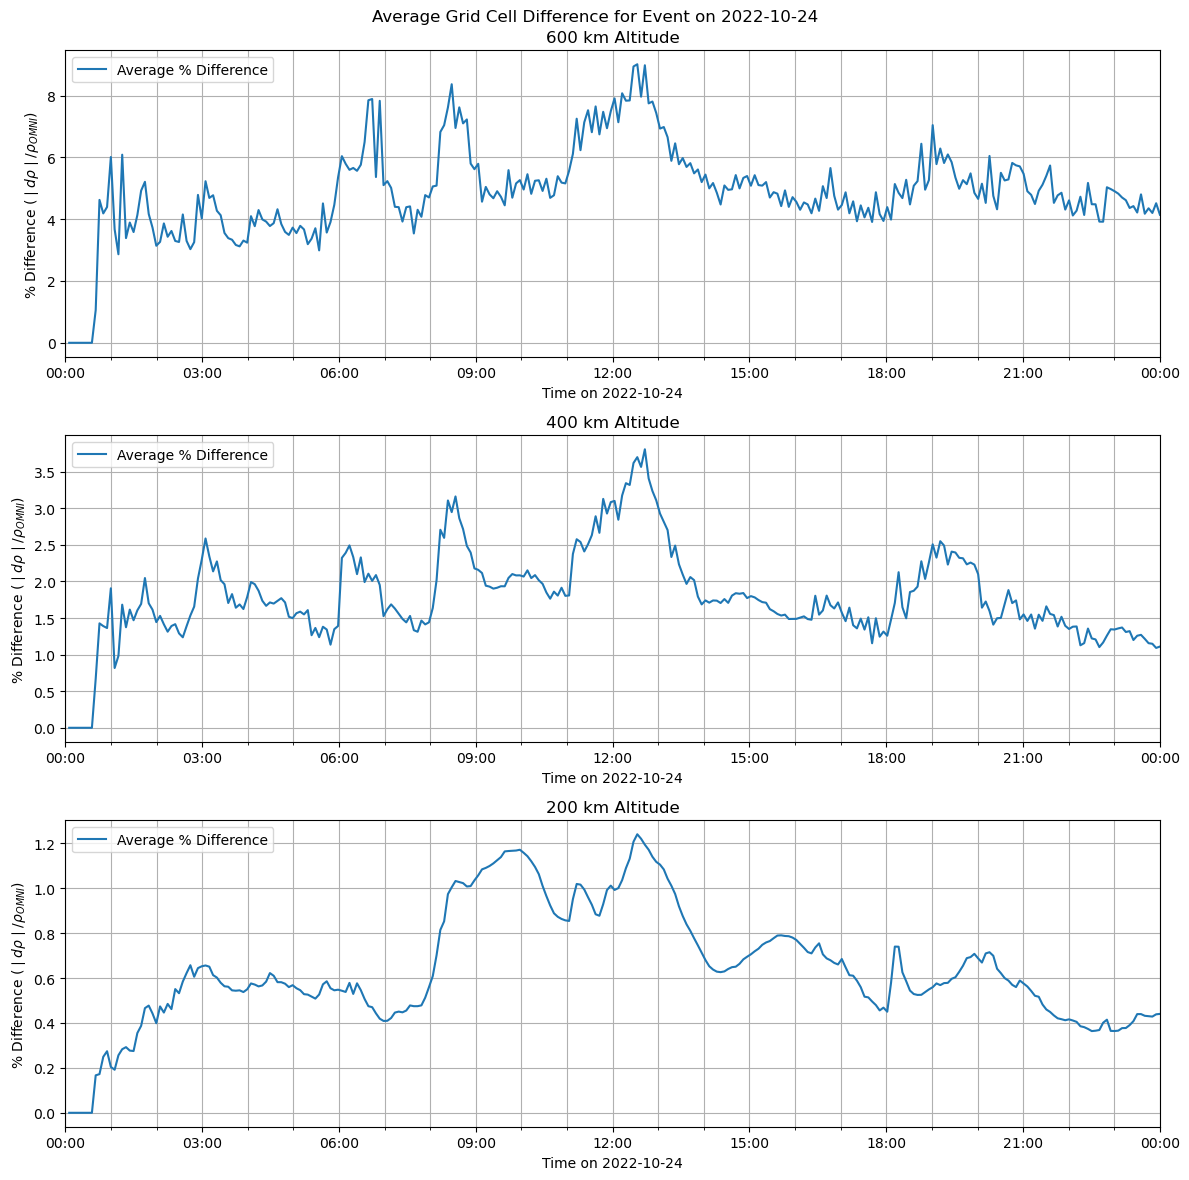

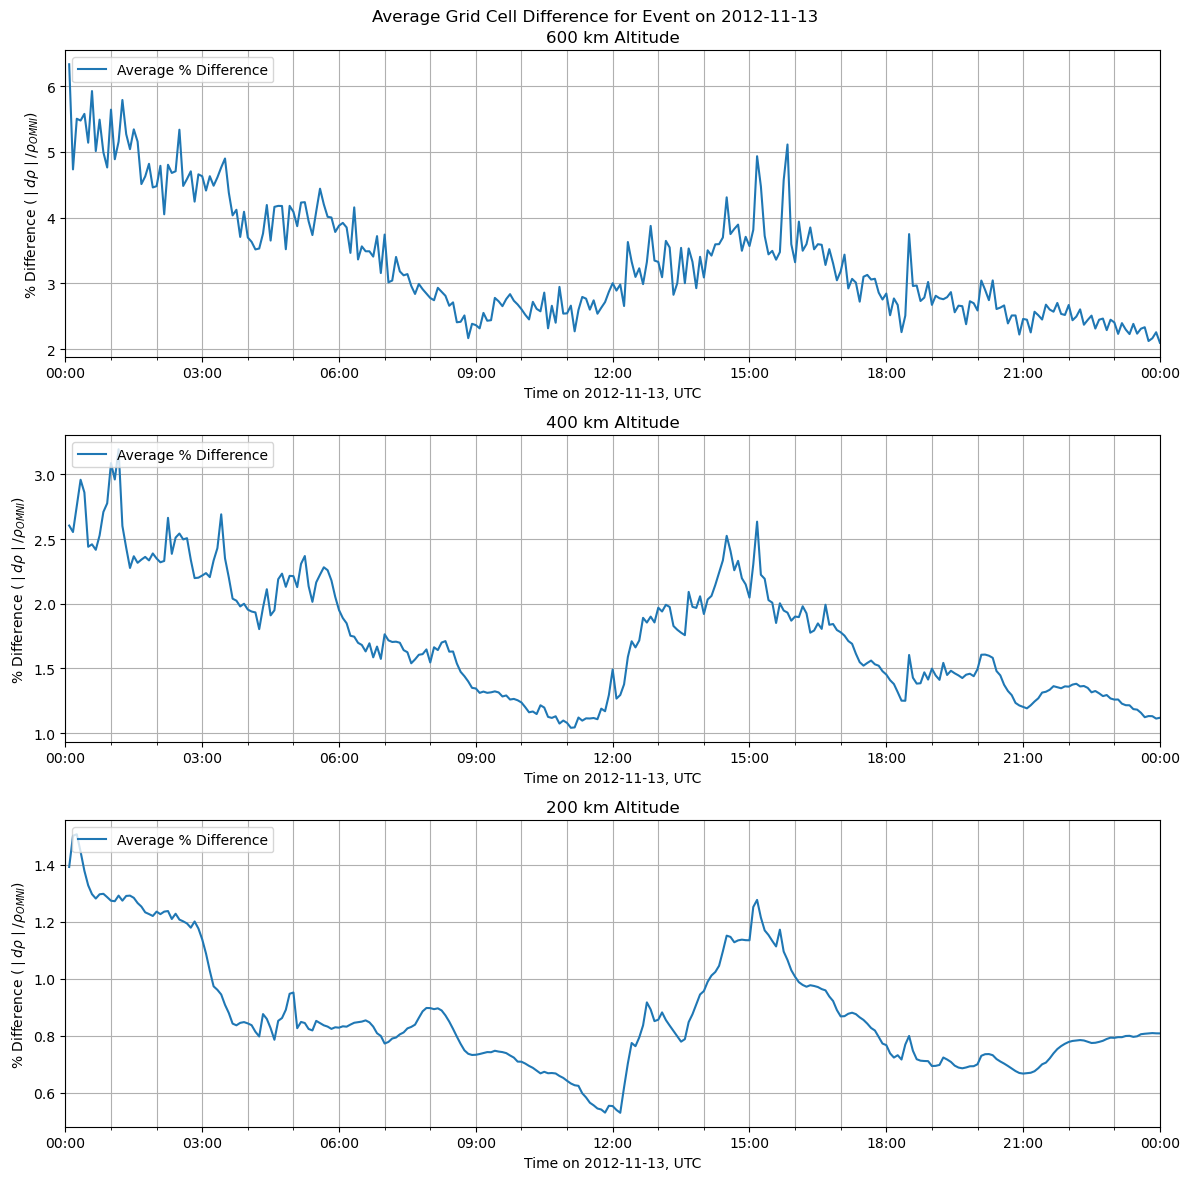

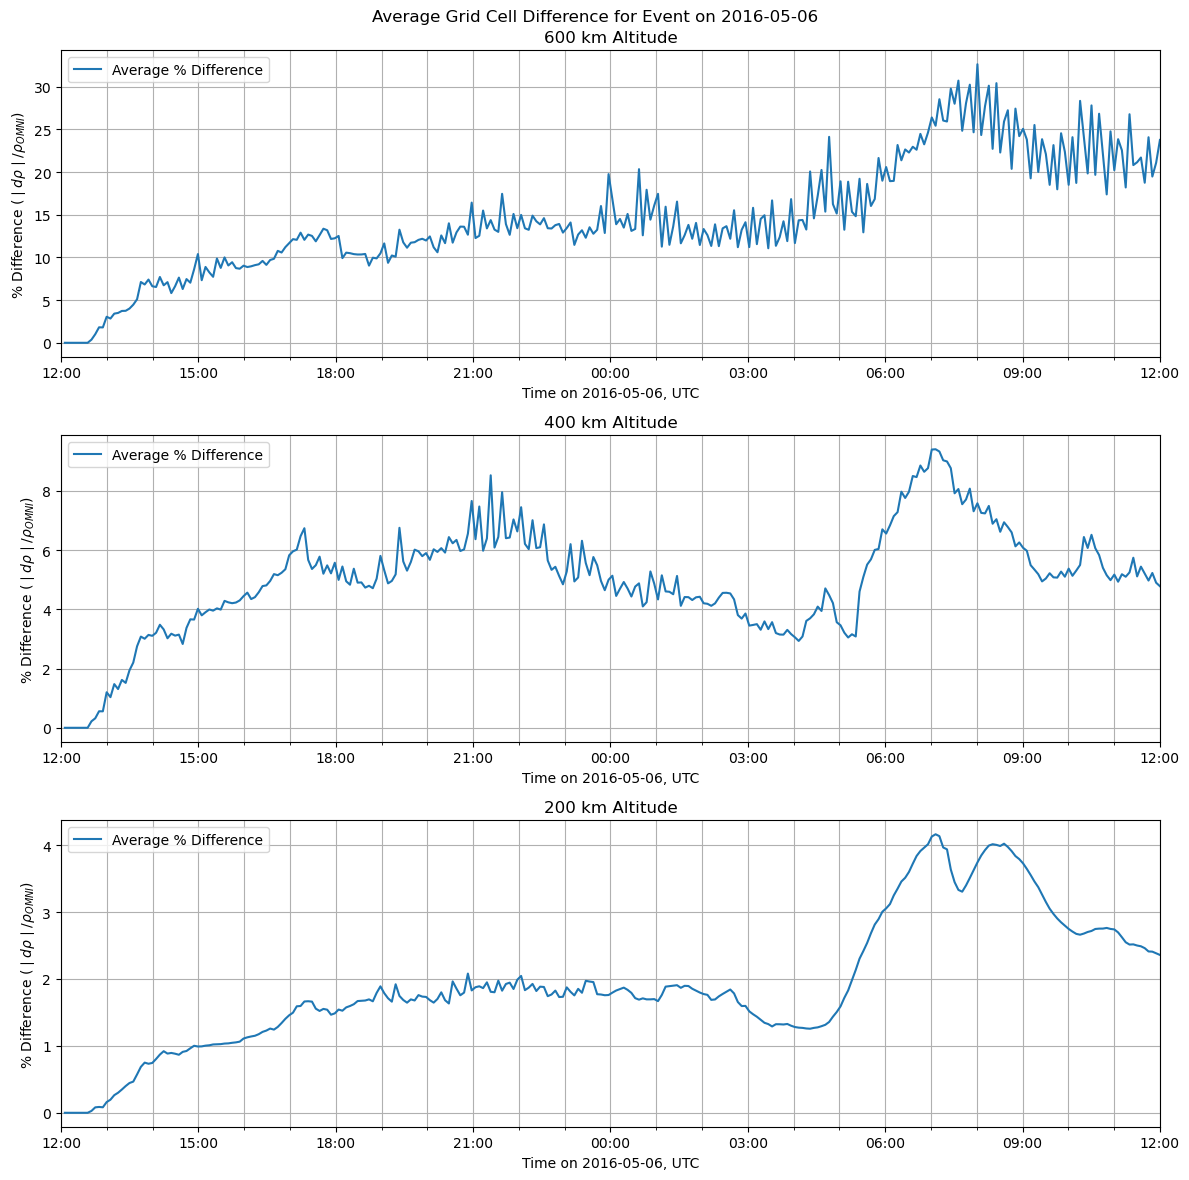

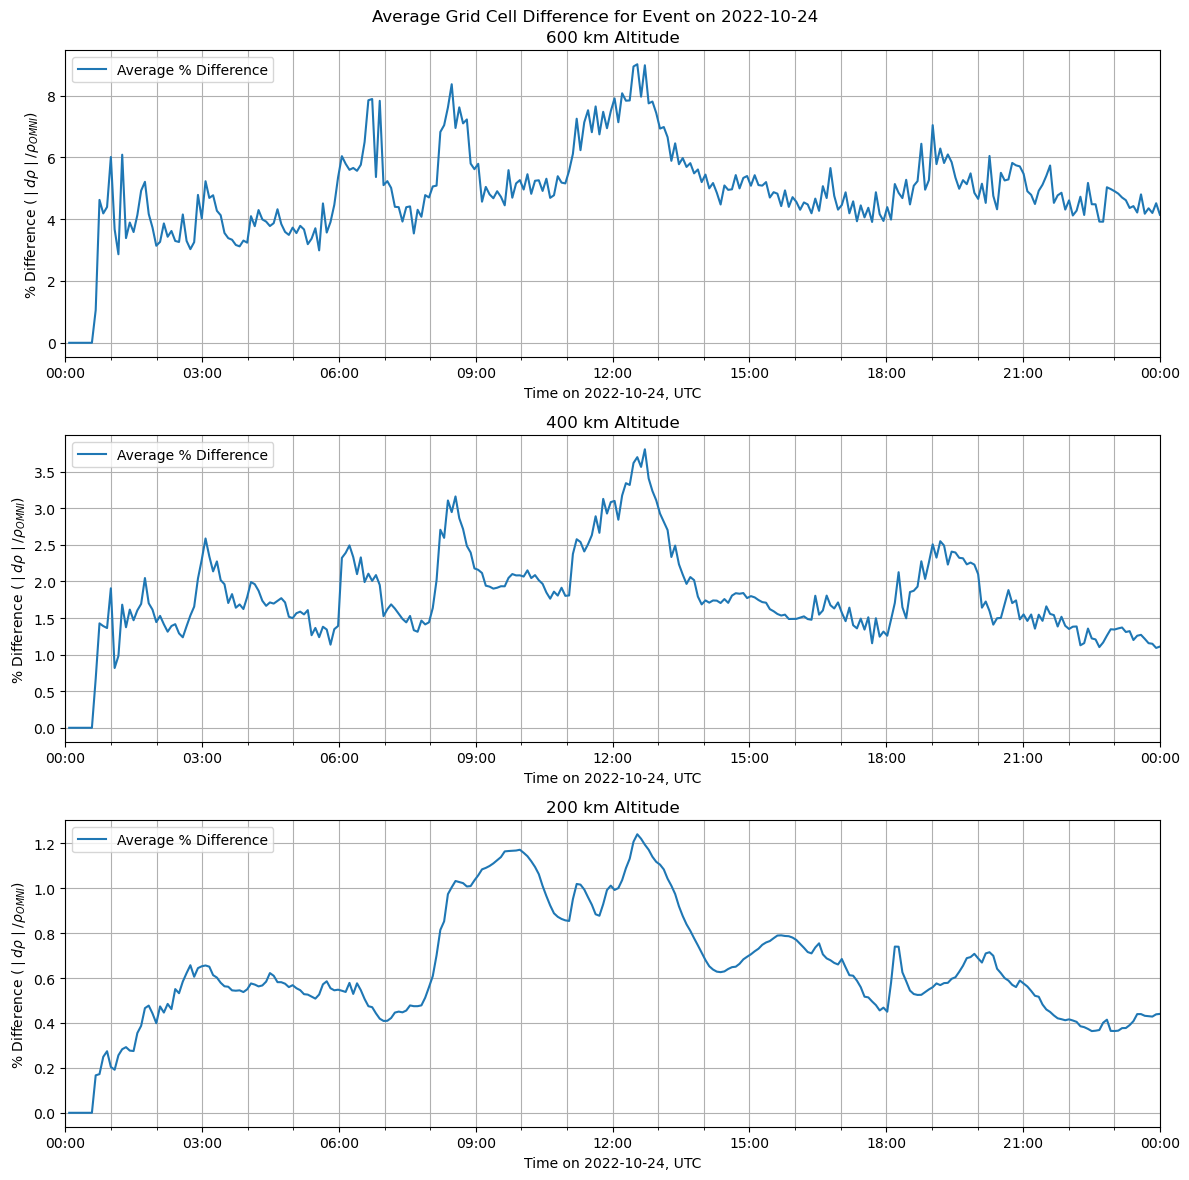

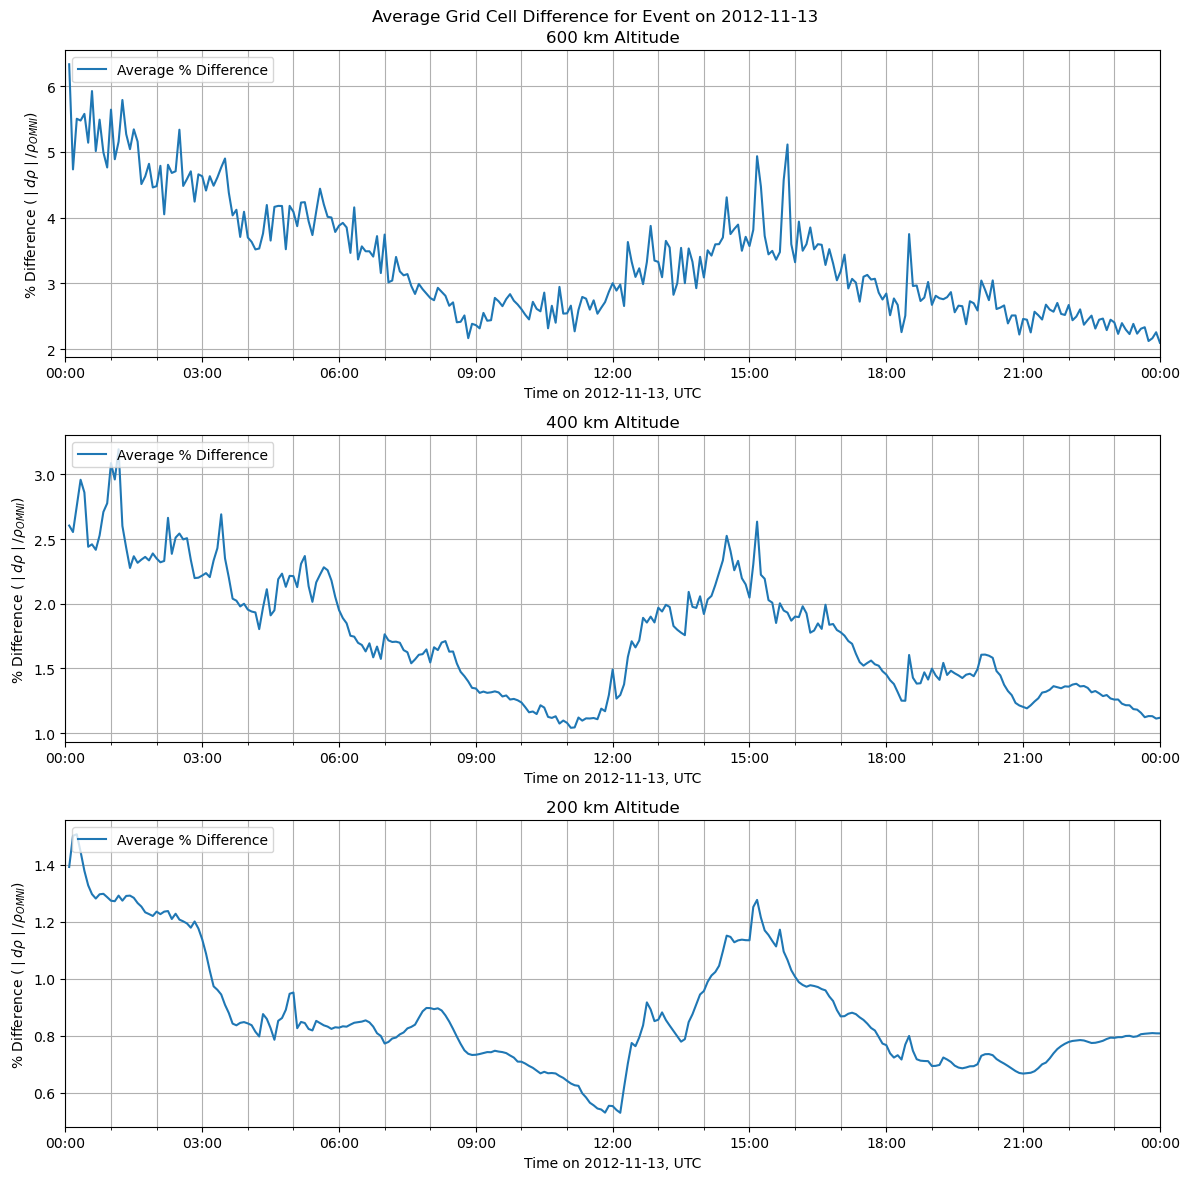

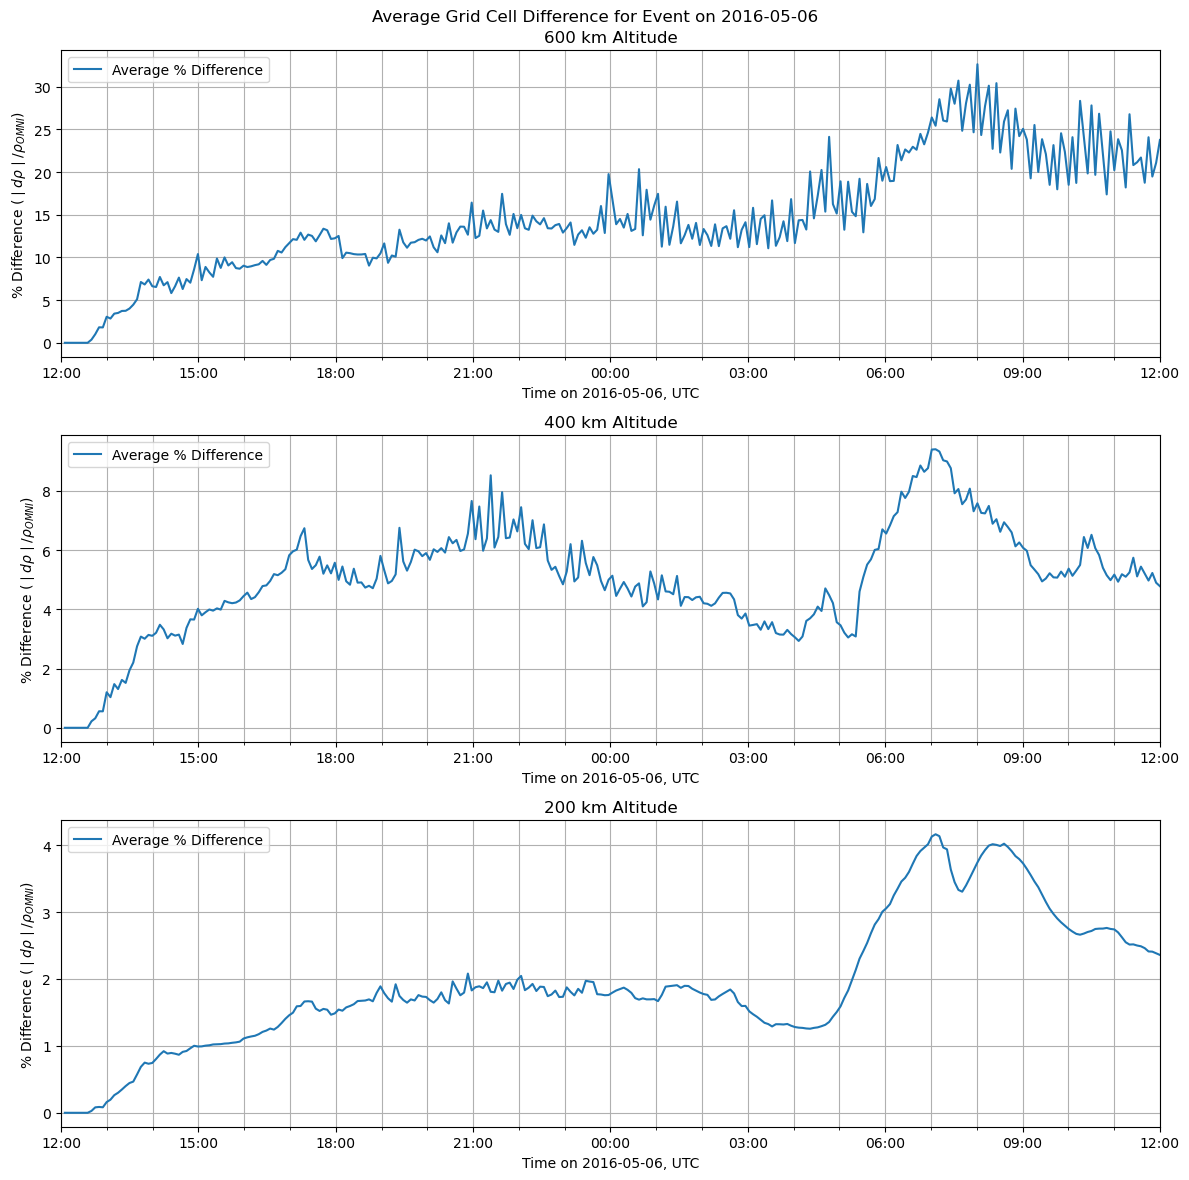

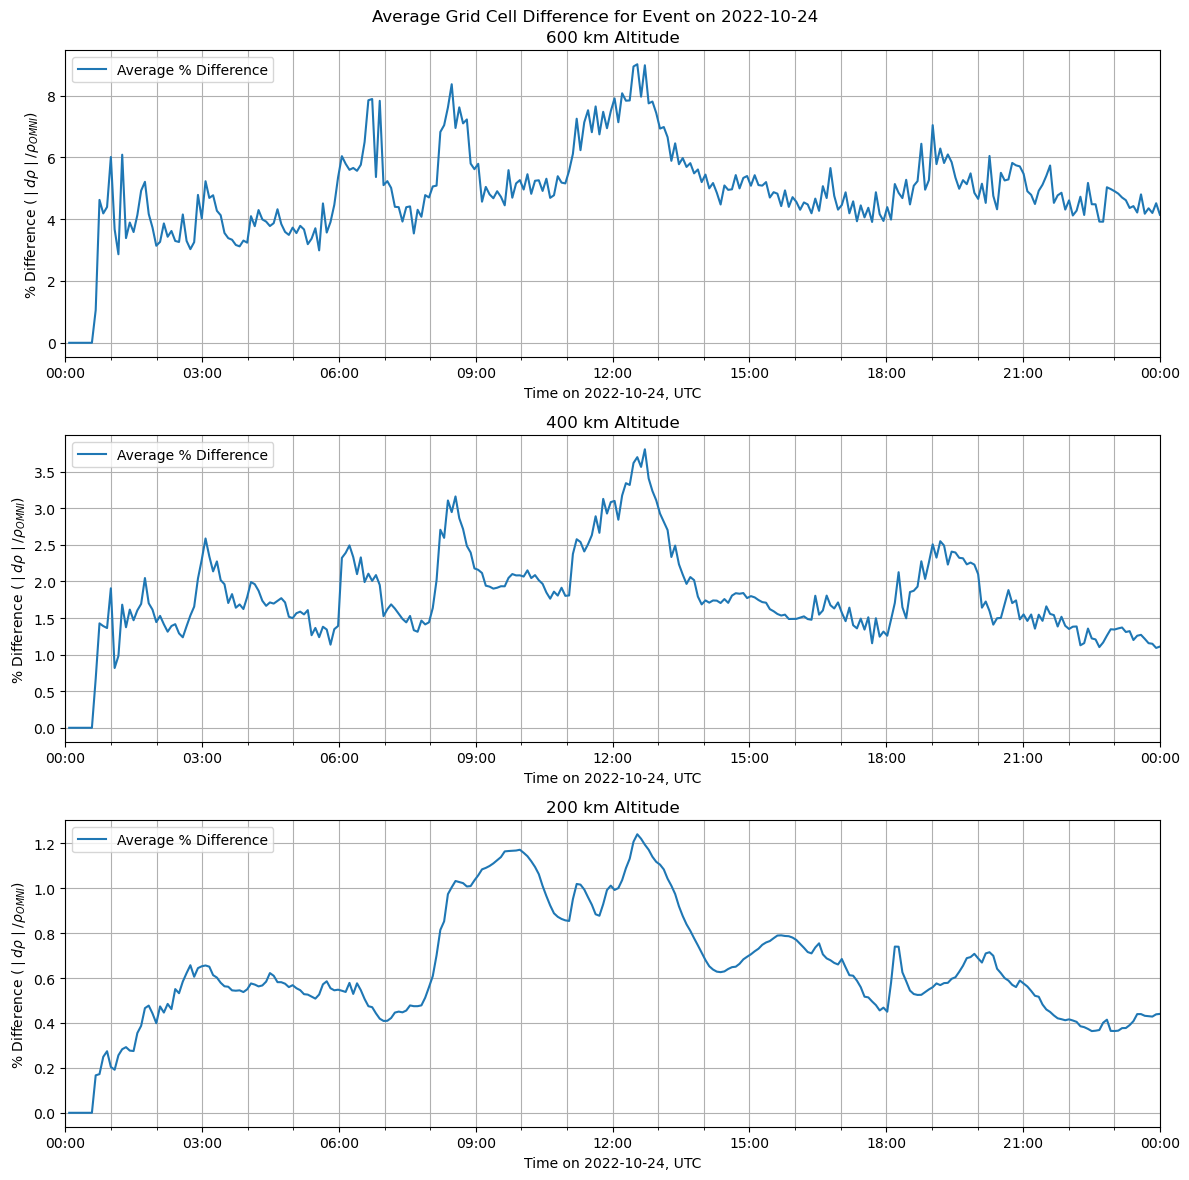

In [17]:
# This plot finds the % difference between each cell over the surface of the Earth, and then averages them for that timestamp.
# To-do: make a plot where the envelope is the highest and lowest density over the Earth for both satellites (maybe)

dates = ['20121113', '20160506', '20221023']
alts = ['600', '400', '200']

for d in dates: # Iterate through the events
    fig, axs = plt.subplots(3, 1, figsize=(12, 12)) # Set up the three subplots for the different altitudes

    for i, a in enumerate(alts):    # Iterate through the altitudes
        omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')    # Load the omni output files at the given altitude on the given date
        artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')  # Load the artemis output files at the given altitude on the given date

        if d == '20121113':
            offset = 0
            d_new = '20121113'
        elif d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        n = len(omni['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date

        timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
        left_timestamp = base_date+timedelta(hours=offset)

        globalPercDiff = []
        globalMax = []
        globalMin = []

        lat_range = slice(8, 136)  # Indices for +/- 80° latitude

        x_omni = omni['glon'][:,0]
        y_omni = omni['glat'][0]
        x_artemis = artemis['glon'][:,0]
        y_artemis = artemis['glat'][0]

        for j in range(len(omni['ut'])):
            df_O = pd.DataFrame(omni['rho'][j])
            df_A = pd.DataFrame(artemis['rho'][j])

            df_O_range = pd.DataFrame(omni['rho'][j][:, 8:136])
            df_A_range = pd.DataFrame(artemis['rho'][j][:, 8:136])

            globalPercDiff.append(np.average(percDiff(df_A, df_O)))
            #globalMax.append(np.amax(percDiff(df_A, df_O)))
            #globalMin.append(np.amin(percDiff(df_A, df_O)))

        #axs[i].fill_between(timestamps, globalMax, globalMin, alpha=0.5)
        axs[i].plot(timestamps, globalPercDiff, label='Average % Difference')
        #axs[i].plot(timestamps, globalMax, label='Max % Difference', color='red', alpha=0.5)
        #axs[i].plot(timestamps, globalMin, label='Min % Difference', color='green', alpha=0.5)


        axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
        axs[i].xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute
        axs[i].set_xlim([left_timestamp, timestamps[-1]]) # Optional: Set x-axis limits explicitly to cover your data range
        axs[i].set(xlabel=f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}, UTC', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)', title=f'{a} km Altitude')
        axs[i].grid(visible=True, which='both', axis='both')

        axs[i].legend(loc='upper left')

    plt.suptitle(f'Average Grid Cell Difference for Event on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}')
    plt.tight_layout()
    plt.savefig(f'overlap_plots/gridcell_percdiff_{d_new}.jpg', dpi=300)

In [4]:
omni = np.load(f'simulation_outputs/20160506_rho_600km_omni.npz')    # Load the omni output files at the given altitude on the given date
artemis = np.load(f'simulation_outputs/20160506_rho_600km_artemis.npz')    # Load the omni output files at the given altitude on the given date

offset = 12
d_new = '20160506'

n = len(omni['ut'])
evenly_spaced_hours = np.linspace(0.083, 24.000, n)
base_date = datetime(datetime.strptime(d_new, "%Y%m%d").year, datetime.strptime(d_new, "%Y%m%d").month, datetime.strptime(d_new, "%Y%m%d").day)  # Base date
timestamps = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
left_timestamp = base_date+timedelta(hours=offset)

df_O = pd.DataFrame(omni['rho'][250][:, 8:136])
df_A = pd.DataFrame(artemis['rho'][250][:, 8:136])

In [5]:
perc = percDiff(df_A, df_O)
row_idx, col_idx = np.unravel_index(np.argmax(perc.values), perc.shape)

In [6]:
print(f"Maximum value is {perc.iat[row_idx, col_idx]}")
print(f"Maximum value is at row {row_idx}, column {col_idx}")

Maximum value is 755.1921430330133
Maximum value is at row 119, column 57


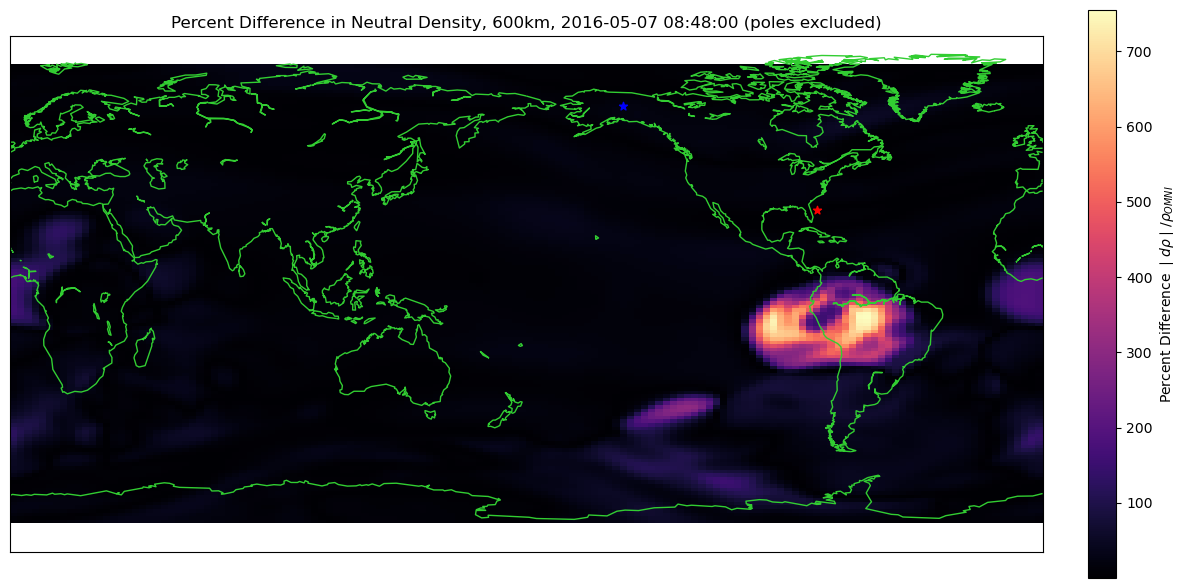

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(12,6))

x1 = omni['glon'][:,0]
y1 = omni['glat'][0]

m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360,resolution='c', ax=ax)
m.drawcoastlines(color='limegreen')

x2 = omni['glon'][:,0]
y2 = omni['glat'][0][8:136]
z = perc

c = ax.pcolormesh(x2, y2, z.T, shading='auto', cmap='magma')

cbar = plt.colorbar(c, fraction=0.046, pad=0.04)
cbar.set_label(r'Percent Difference $\mid d\rho\mid/\rho_{OMNI}$')

plt.scatter(x1[112], y1[95], c='red', marker='*')
plt.scatter(x1[85], y1[124], c='blue', marker='*')
plt.title('Percent Difference in Neutral Density, 600km, 2016-05-07 08:48:00 (poles excluded)')

plt.tight_layout()
plt.savefig('overlap_plots/largestPD.jpg')
plt.show()

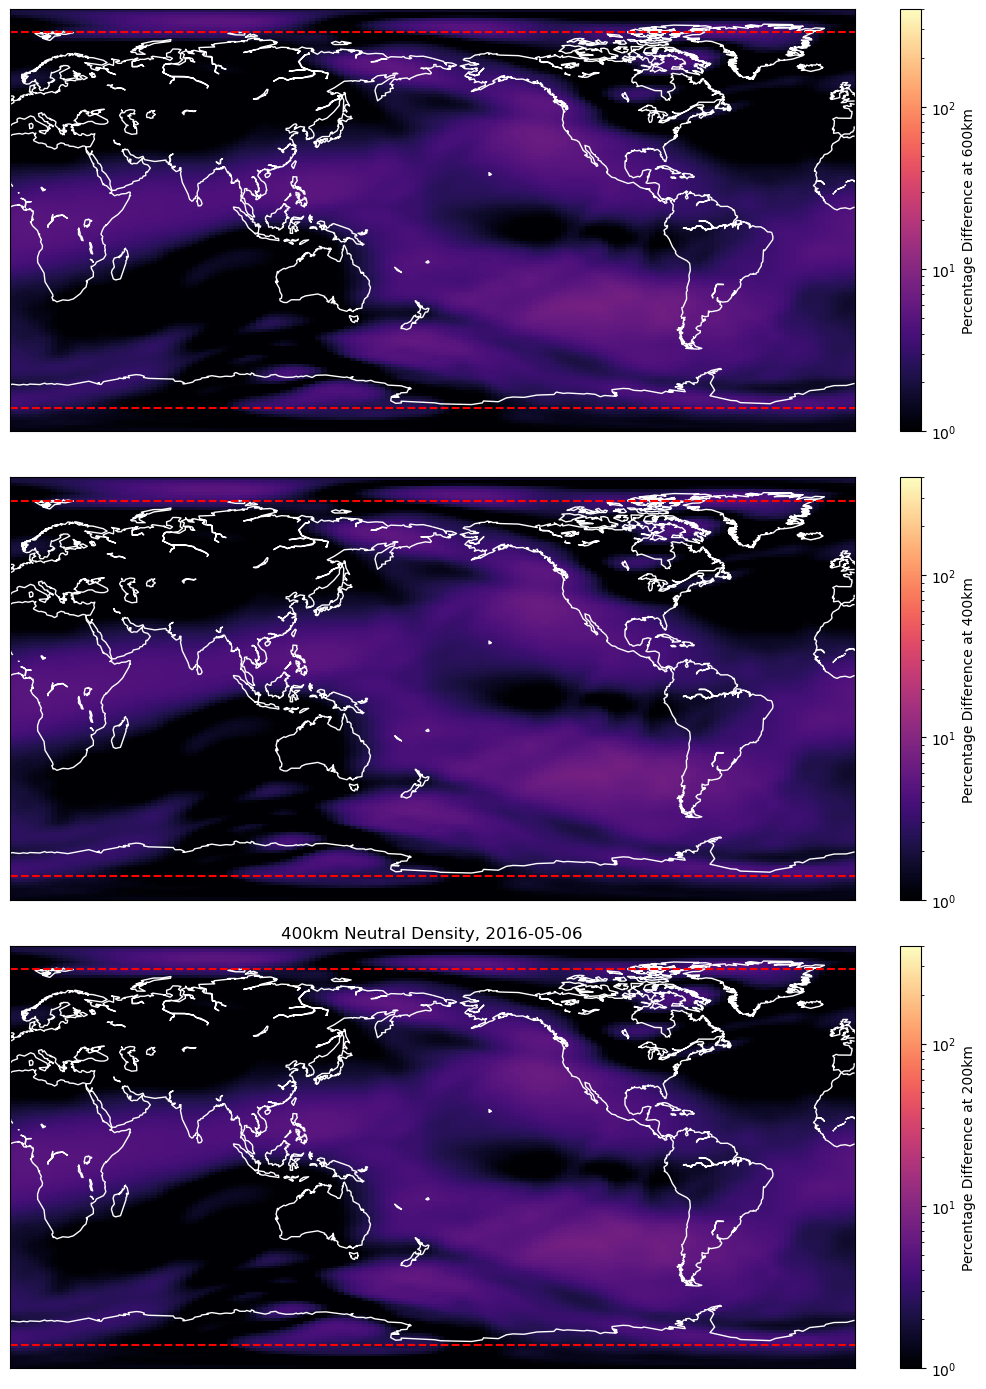

/Users/espen/anaconda3/envs/solarwind/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

dates = ['20160506', '20221023']
alts = ['600', '400', '200']

for d in dates:
    errKSC = pd.DataFrame(columns=alts)
    fig, axs = plt.subplots(3, 1, figsize=(12, 14))

    pcolormeshes = []

    for i, a in enumerate(alts):

        omni = np.load(f'simulation_outputs/{d}_rho_{a}km_omni.npz')
        artemis = np.load(f'simulation_outputs/{d}_rho_{a}km_artemis.npz')

        x = omni['glon'][:,0]
        y = omni['glat'][0]

        if d == '20160506':
            offset = 12
            d_new = '20160506'
        else:
            offset = 0
            d_new = '20221024'

        percDiffArr = []
        for j in range(len(omni['ut'])):

            df_O = pd.DataFrame(omni['rho'][j], columns=omni['glon'][:,0], index=omni['glat'][0])
            df_A = pd.DataFrame(artemis['rho'][j], columns=artemis['glon'][:,0], index=artemis['glat'][0])

            percDiffs = np.abs(percDiff(df_A, df_O))
            percDiffs[percDiffs > 300] = 9999
            percDiffArr.append(percDiffs)

        z = np.array(percDiffArr)

        num_frames = z.shape[0]

        m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360,resolution='c', ax=axs[i])
        m.drawcoastlines(color='white')

        norm = mcolors.LogNorm(vmin=1 , vmax=400)
        cmap = plt.get_cmap('magma').copy()
        cmap.set_over('green')

        c = axs[i].pcolormesh(x, y, z[0].T, shading='auto', cmap=cmap, norm=norm)
        pcolormeshes.append(c)
        axs[i].hlines((-80, 80), 0, 361, color='red', linestyles='dashed')

        cbar = plt.colorbar(c, ax=axs[i], fraction=0.046, pad=0.04)
        cbar.set_label(f'Percentage Difference at {a}km')


    def init():
        # Initialize all subplots' pcolormesh objects with the first frame
        for i, c in enumerate(pcolormeshes):
            c.set_array(z[0].T.ravel())
        return pcolormeshes

    def update(frame):
        # Update each subplot's pcolormesh for the current frame
        for i, c in enumerate(pcolormeshes):
            c.set_array(z[frame].T.ravel())
        return pcolormeshes

    plt.title('400km Neutral Density, 2016-05-06')
    anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
    anim.save(f'overlap_plots/Percdiffs_{d_new}.mp4', writer='ffmpeg', fps=10)
    plt.tight_layout()
    plt.show()

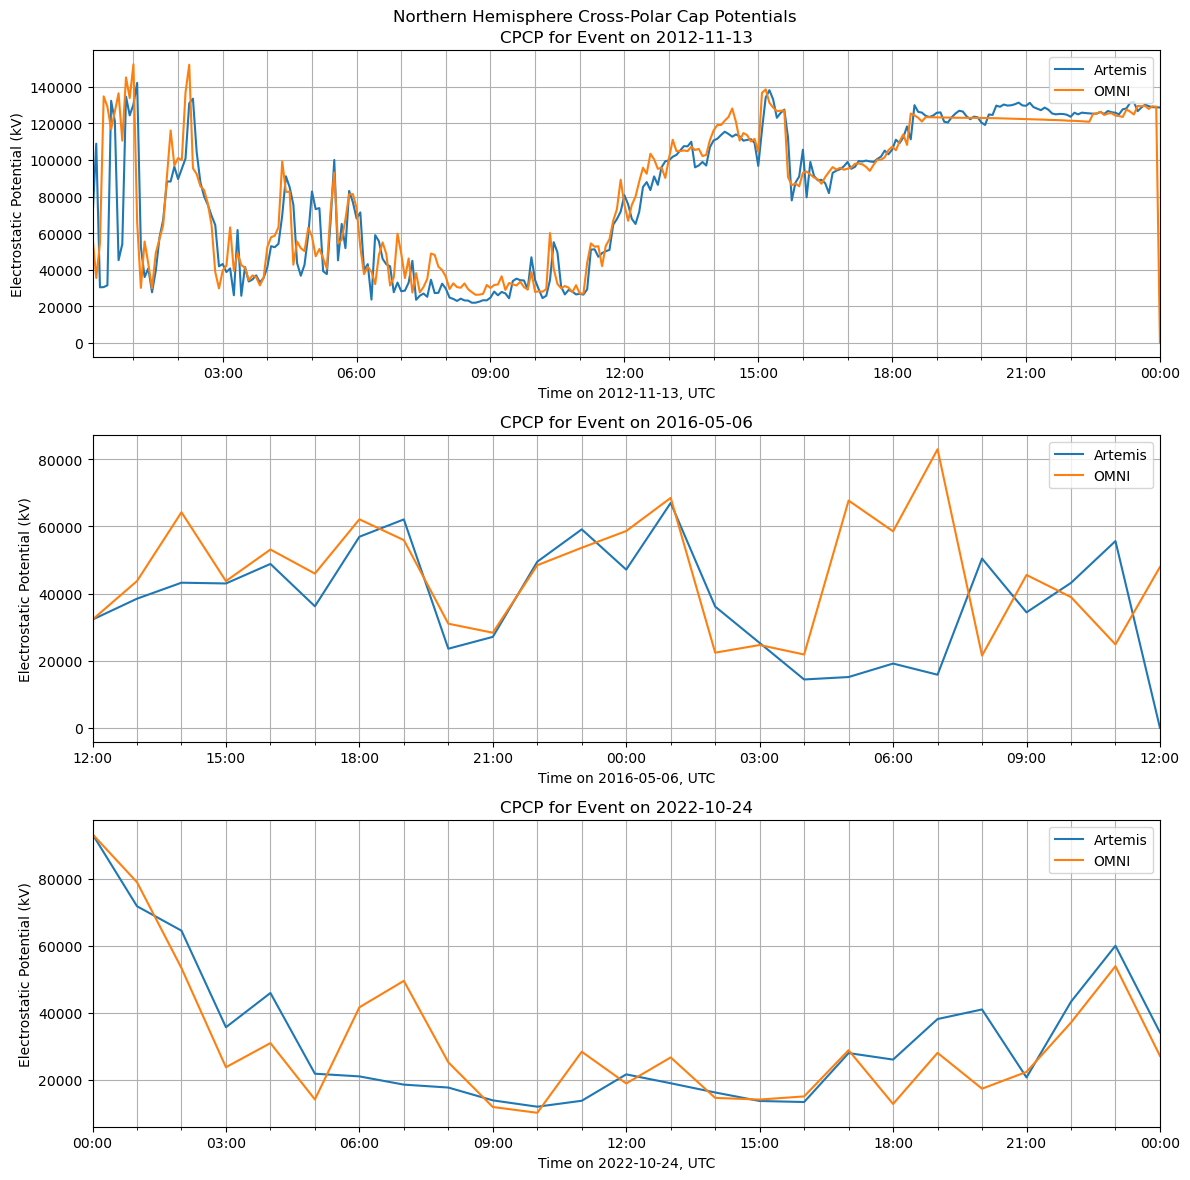

In [18]:
dates = ['20121113', '20160506', '20221024']

fig, ax = plt.subplots(3, 1, figsize=(12, 12)) # Set up the three subplots for the different altitudes

for i, d in enumerate(dates): # Iterate through the events
    omni = np.load(f'simulation_outputs/crosspolar/omni_{d}_CPCP.npz')    # Load the omni output files on the given date
    artemis = np.load(f'simulation_outputs/crosspolar/artemis_{d}_CPCP.npz')  # Load the artemis output files on the given date

    if d == '20121113':
        n = len(omni['ut'])
        evenly_spaced_hours = np.linspace(0.083, 24.000, n)
        base_date = datetime(datetime.strptime(d, "%Y%m%d").year, datetime.strptime(d, "%Y%m%d").month, datetime.strptime(d, "%Y%m%d").day)  # Base date
        #times = [base_date + timedelta(hours=hour+offset) for hour in evenly_spaced_hours]
        times = [base_date + timedelta(hours=hour) for hour in evenly_spaced_hours]

        d_new = '20121113'
    elif d == '20160506':
        times = [datetime(2016, 5, 6, 12) + timedelta(hours=hour) for hour in range(25)]
        d_new = '20160506'
    else:
        times = [datetime(2022, 1, 24, 0) + timedelta(hours=hour) for hour in range(25)]
        d_new = '20221024'

    ax[i].plot(times, artemis['cpcp_nh'], label='Artemis')
    ax[i].plot(times, omni['cpcp_nh'], label='OMNI')

    ax[i].xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Major ticks every 3 hours
    ax[i].xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # Minor ticks every hour
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format as Hour:Minute

    ax[i].grid(visible=True, which='both', axis='both')
    ax[i].set_xlim(times[0], times[-1])
    ax[i].set_xlabel(f'Time on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}, UTC')
    ax[i].set_ylabel(f'Electrostatic Potential (kV)')
    ax[i].set_title(f'CPCP for Event on {datetime.strptime(d_new, "%Y%m%d").strftime("%Y-%m-%d")}')
    ax[i].legend(loc='upper right')

plt.suptitle(f'Northern Hemisphere Cross-Polar Cap Potentials')
plt.tight_layout()
plt.savefig(f'overlap_plots/CPCP.jpg', dpi=300)

In [6]:
omni = np.load(f'simulation_outputs/20160506_rho_400km_omni.npz')
artemis = np.load(f'simulation_outputs/20160506_rho_400km_artemis.npz')

kennedyOmni = []
kennedyArtemis = []

In [7]:
df_O = pd.DataFrame(omni['rho'][0], columns=omni['glon'][:,0], index=omni['glat'][0])

In [ ]:
bins = list(range(16))

fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for i, column in enumerate(errKSC.columns):
    n, bins, patches = ax[i].hist(errKSC[column], bins=bins, label=f'{column} km', edgecolor='black', color=f'C{i}')
    ax[i].set_ylabel('Frequency (counts)')
    ax[i].set_title(f'{column} km')
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax[i].set_ylim(0, max(n) * 1.1)  # Increase upper limit by 10% of the max count

    for count, x in zip(n, bins[:-1]):  # bins[:-1] to avoid placing text on the last bin edge
        ax[i].text(x + 0.5, count, f'{int(count)}', ha='center', va='bottom')

    total_points = len(errKSC[column])
    ax[i].text(0.98, 0.95, f'Total points = {total_points}', ha='right', va='top', transform=ax[i].transAxes)
    ax[i].text(0.98, 0.85, f'Stdv.: {round(np.std(errKSC[column]), 2)}', ha='right', va='top', transform=ax[i].transAxes)
    ax[i].text(0.98, 0.75, f'Mean: {round(np.mean(errKSC[column]), 2)}', ha='right', va='top', transform=ax[i].transAxes)


plt.suptitle('Distribution of Percentage Differences over Kennedy Space Center')
ax[2].set_xlim(0, 15)
ax[2].set_xlabel(r'Binned Percentage Difference from OMNI, $\frac{\mid d\rho\mid}{\rho_{OMNI}}$')
plt.tight_layout()
plt.savefig('overlap_plots/Distribution_KSC.jpg')
plt.show()

In [ ]:
bins = list(range(16))

fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for i, column in enumerate(errCMO.columns):
    n, bins, patches = ax[i].hist(errCMO[column], bins=bins, label=f'{column} km', edgecolor='black', color=f'C{i}')
    ax[i].set_ylabel('Frequency (counts)')
    ax[i].set_title(f'{column} km')
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[i].yaxis.set_minor_locator(ticker.MultipleLocator(10))
    ax[i].set_ylim(0, max(n) * 1.1)  # Increase upper limit by 10% of the max count

    for count, x in zip(n, bins[:-1]):  # bins[:-1] to avoid placing text on the last bin edge
        ax[i].text(x + 0.5, count, f'{int(count)}', ha='center', va='bottom')

    total_points = len(errCMO[column])
    ax[i].text(0.98, 0.95, f'Total points = {total_points}', ha='right', va='top', transform=ax[i].transAxes)
    ax[i].text(0.98, 0.85, f'Stdv.: {round(np.std(errCMO[column]), 2)}', ha='right', va='top', transform=ax[i].transAxes)
    ax[i].text(0.98, 0.75, f'Mean: {round(np.mean(errCMO[column]), 2)}', ha='right', va='top', transform=ax[i].transAxes)


plt.suptitle('Distribution of Percentage Differences over College, AK')
ax[2].set_xlim(0, 15)
ax[2].set_xlabel(r'Binned Percentage Difference from OMNI, $\frac{\mid d\rho\mid}{\rho_{OMNI}}$')
plt.tight_layout()
plt.savefig('overlap_plots/Distribution_CMO.jpg')
plt.show()

In [ ]:
def abline(slope, intercept, axis, color, label):
    x_vals = np.array(axis.get_xlim())
    y_vals = intercept + slope * x_vals
    axis.plot(x_vals, y_vals, c=color, label=label)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,4), sharex=True)

for i, a in enumerate(alts):
    ax.scatter(errCPCP, errKSC[a], s=8, alpha=0.3, c=f'C{i}', label=f'{a} km')
    statistics = stats.linregress(errCPCP, errKSC[a])
    #abline(statistics[0], statistics[1], ax, color=f'C{i}', label=f'{a} km')
    ax.set(xlim=(0, 100), xlabel=r'% Difference ($\frac{\mid d_{cpcp}\mid}{cpcp_{OMNI}}$)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)', title='Errors in CPCP and Neutral Density over KSC')

    pcc, _ = stats.pearsonr(errCPCP, errKSC[a])
    print(pcc)

    #equation_text = f'{a} km: {round(statistics[1], 1)}x+{round(statistics[0], 1)}'
    equation_text = f'{a} km: {round(pcc, 3)}'
    ax.text(0.831, 0.91-(0.06*i), equation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top',horizontalalignment='left')

ax.text(1, 0.97, 'Pearson Correlations: ', transform=ax.transAxes, fontsize=10, verticalalignment='top',horizontalalignment='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('overlap_plots/scatter_ksc.jpg', dpi=300)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,4))

for i, a in enumerate(alts):
    ax.scatter(errCPCP, errCMO[a], s=8, alpha=0.3, c=f'C{i}', label=f'{a} km')
    statistics = stats.linregress(errCPCP,errCMO[a])
    #abline(statistics[0], statistics[1], ax, color=f'C{i}', label=f'{a} km')
    ax.set(xlim=(0, 100), xlabel=r'% Difference ($\frac{\mid d_{cpcp}\mid}{cpcp_{OMNI}}$)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)', title='Errors in CPCP and Neutral Density over CMO')

    equation_text = f'{a} km: {round(statistics[1], 1)}x+{round(statistics[0], 1)}'
    #ax.text(0.82, 0.97-(0.1*i), equation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', pad=3))

    pcc, _ = stats.pearsonr(errCPCP, errCMO[a])
    print(pcc)

    #equation_text = f'{a} km: {round(statistics[1], 1)}x+{round(statistics[0], 1)}'
    equation_text = f'{a} km: {round(pcc, 3)}'
    ax.text(0.833, 0.91-(0.06*i), equation_text, transform=ax.transAxes, fontsize=10, verticalalignment='top',horizontalalignment='left')

ax.text(1, 0.97, 'Pearson Correlations: ', transform=ax.transAxes, fontsize=10, verticalalignment='top',horizontalalignment='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('overlap_plots/scatter_cmo.jpg', dpi=300)

In [ ]:
alts = ['600', '400', '200']
errKSC = pd.DataFrame(columns=alts)
errCMO = pd.DataFrame(columns=alts)

for a in alts:
    omni = np.load(f'data_v3/20121113_rho_{a}km_omni.npz')
    artemis = np.load(f'data_v3/20121113_rho_{a}km_artemis.npz')


    kennedyOmni = []
    kennedyArtemis = []

    cmoOmni = []
    cmoArtemis = []

    vfbOmni = []
    vfbArtemis = []

    for i in range(len(omni['ut'])):
        df_O = pd.DataFrame(omni['rho'][i], columns=omni['glon'][:,0], index=omni['glat'][0])
        df_A = pd.DataFrame(artemis['rho'][i], columns=artemis['glon'][:,0], index=artemis['glat'][0])

        kennedyOmni.append(df_O[281.25][29.37499999999993])
        kennedyArtemis.append(df_A[281.25][29.37499999999993])

        cmoOmni.append(df_O[213.75][65.62499999999997])
        cmoArtemis.append(df_A[213.75][65.62499999999997])

        vfbOmni.append(df_O[241.25000000000003][35.62499999999997])
        vfbArtemis.append(df_A[241.25000000000003][35.62499999999997])


    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax[0].set_title(f'Thermospheric Neutral Density over Kennedy Space Center, {a} km')

    ax[0].plot(omni['ut'], kennedyArtemis, label='Artemis')
    ax[0].plot(omni['ut'], kennedyOmni, label='Omni')
    ax[0].set(ylabel=r'Neutral Density ($kg/m^{3}$)')
    ax[0].legend(loc='lower right')

    ax[1].set(xlim=(0,24), ylim=(0,15), xlabel='Time on 2012-11-13 (UT)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
    diff = percDiff(kennedyArtemis, kennedyOmni)
    errKSC[a] = diff

    ax[1].plot(omni['ut'], diff, label='Omni')
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.tight_layout()
    plt.savefig(f'overlap_plots/Kennedy_neutral_{a}km.jpg')


    fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    ax[0].set_title(f'Thermospheric Neutral Density over College AK (CMO), {a} km')

    ax[0].plot(omni['ut'], cmoArtemis, label='Artemis')
    ax[0].plot(omni['ut'], cmoOmni, label='Omni')
    ax[0].set(ylabel=r'Neutral Density ($kg/m^{3}$)')
    ax[0].legend(loc='lower right')

    ax[1].set(xlim=(0,24), ylim=(0,15), xlabel='Time on 2012-11-13 (UT)', ylabel=r'% Difference ($\mid d\rho\mid/\rho_{OMNI}$)')
    diff = percDiff(cmoArtemis, cmoOmni)
    errCMO[a] = diff

    ax[1].plot(omni['ut'], diff, label='Omni')
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(3))
    ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))


    plt.tight_layout()
    plt.savefig(f'overlap_plots/CMO_neutral_{a}km.jpg')

errKSC.to_csv('errKSC.csv', index=False)
errCMO.to_csv('errCMO.csv', index=False)